<a href="https://colab.research.google.com/github/Harshita-Pokharna/CAPSTONE-PROJECT--Netflix-Movies-And-Tv-shows-Clustering/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows: Clustering

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Harshita Pokharna

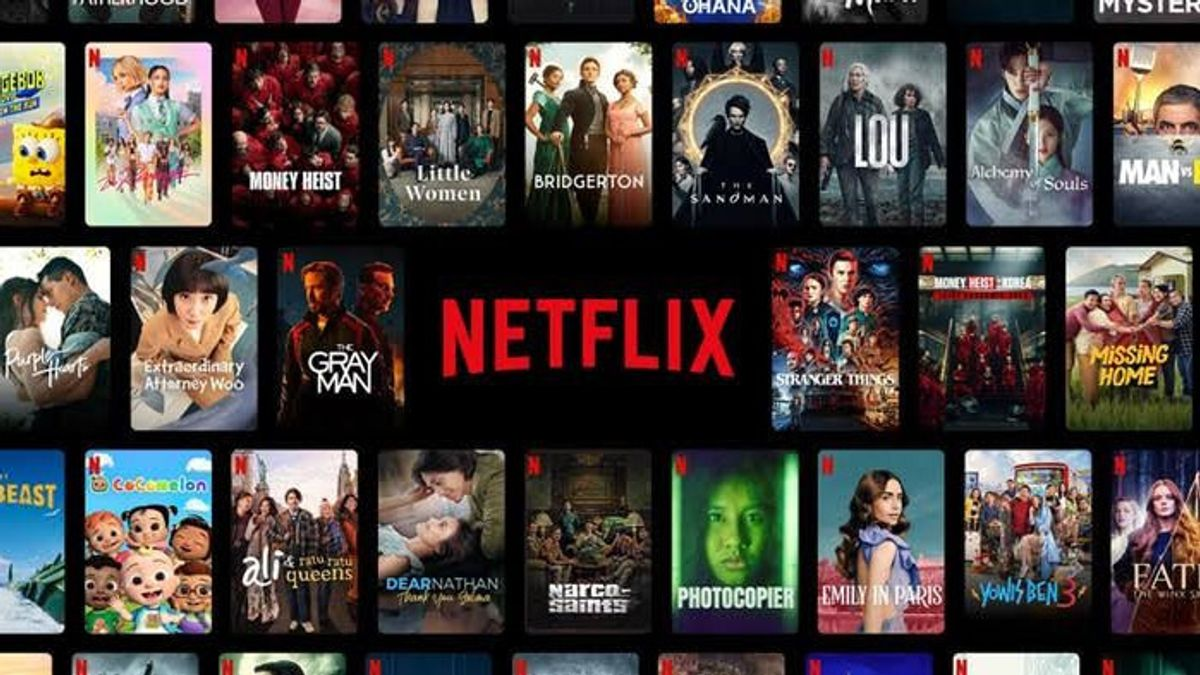

# **Project Summary -**

Netflix, a premier streaming service, caters to over 220 million subscribers worldwide with an extensive collection of movies and TV shows. Utilizing sophisticated algorithms and data analytics, Netflix personalizes content recommendations, aiming to enhance user satisfaction, boost engagement, and reduce subscriber churn, maintaining its dominant position in the entertainment industry.

The primary objective of this project is to analyze the Netflix Dataset encompassing movies and TV shows up to 2019, obtained from the third-party search engine, Flixable. The overarching aim is to leverage NLP techniques to categorize this content into meaningful clusters, ultimately enhancing the user experience through a recommendation system. This strategic approach is designed to mitigate subscriber churn for Netflix.

In addition to recommendation system development, this project includes an in-depth examination of the dataset to unearth valuable insights and emerging trends within the streaming entertainment industry.

The project unfolds in a systematic manner, progressing through the following key steps:
* Handling Duplicate values
* Handling missing/null data, ensuring the dataset's completeness.
* Data Transformation-Typecasting for accurate analysis
* Categorizing the rating attribute into distinct categories, including adult,teens,Olderkids and kids
* Conducting Exploratory Data Analysis (EDA) to glean insights crucial for mitigating subscriber churn.
* Constructing clusters using attributes such as director, cast, country, genre, rating, and description. These attributes undergo tokenization, preprocessing, and vectorization through the TF-IDF vectorizer.
* Diminishing the dataset's dimensionality via Principal Component Analysis (PCA) to bolster overall performance.
* Deploying K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, culminating in the identification of optimal cluster numbers (6 for K-Means, 2 for hierarchical clustering) through the application of diverse evaluation techniques.
* Crafting a content-based recommender system employing a cosine similarity matrix, tailoring personalized recommendations to users with the primary aim of curbing subscriber churn on the Netflix platform.

This comprehensive analysis and recommendation system is anticipated to elevate user satisfaction, thereby contributing to enhanced retention rates for Netflix.

# **GitHub Link -**

https://github.com/Harshita-Pokharna/CAPSTONE-PROJECT--Netflix-Movies-And-Tv-shows-Clustering

# **Problem Statement**

* The problem is to cluster Netflix movies and TV shows based on their attributes and textual features. The dataset contains information like titles, directors, cast, countries, release years, ratings, durations, genres, and descriptions.

* The objectives are to explore the dataset, analyze content availability across countries, assess Netflix's focus on TV shows versus movies, and cluster similar content using text-based features.

* By creating clusters, we can gain insights into the similarities and differences among the shows, enabling the delivery of personalized show recommendations tailored to individual preferences.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Import Data Visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

### Dataset Loading

In [2]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/capstone project 5/Netflix Movies And Tv Shows Clustering.csv")
data_new=data.copy()

### Dataset First View

In [4]:
# Dataset First Look
# Fisrt 5 Rows of dataset
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
# Last 5 Rows of dataset
data.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
rows=data.shape[0]
columns=data.shape[1]
print(f"The number of Rows is {rows} and number of Columns is {columns}")

The number of Rows is 7787 and number of Columns is 12


### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

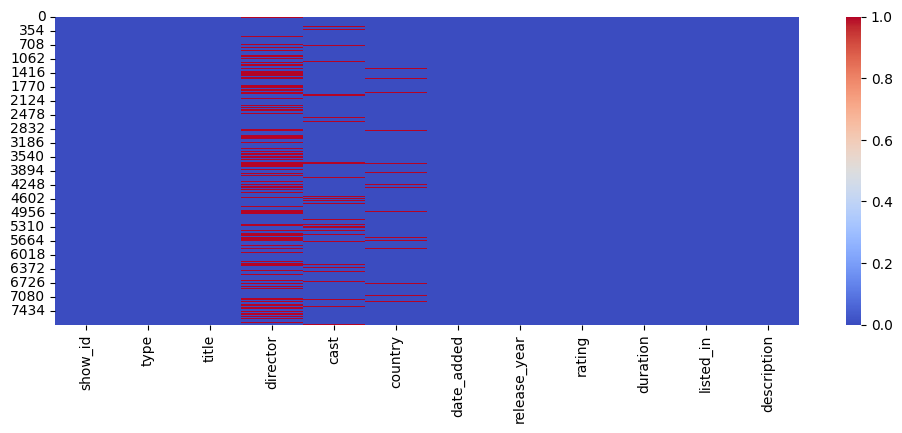

In [10]:
# Visualizing the missing values using HeatMap
plt.figure(figsize=(12,4))
sns.heatmap(data.isna(), cmap = 'coolwarm')

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
column_names=list(data.columns)
print("Columns present in Dataset are :")
column_names

Columns present in Dataset are :


['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [12]:
# Dataset Describe
data.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i," = ",data[i].nunique(),)

No. of unique values in  show_id  =  7787
No. of unique values in  type  =  2
No. of unique values in  title  =  7787
No. of unique values in  director  =  4049
No. of unique values in  cast  =  6831
No. of unique values in  country  =  681
No. of unique values in  date_added  =  1565
No. of unique values in  release_year  =  73
No. of unique values in  rating  =  14
No. of unique values in  duration  =  216
No. of unique values in  listed_in  =  492
No. of unique values in  description  =  7769


## 3. ***Data Wrangling***

### Data Wrangling Code

####**Handling Duplicate values**

In [14]:
## check duplicate rows in dataset
data.duplicated().sum()

0

**So there is no duplicate value in our dataset**

####**Handling Null Values**

In [15]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Columns containing null values are :**
1. director
2. cast
3. country
4. date_added
5. release_year


In [16]:
#'date_added' and 'rating' have low number of missing values i.e. 10 and 7 respectively, so we will drop them from the dataset
data.dropna(subset=['date_added','rating'],inplace=True)

In [17]:
# Imputing null values of country with Mode
data['country']=data['country'].fillna(data['country'].mode()[0])

In [18]:
# Imputing with unknown in null values of director and cast feature
data[['director','cast']]=data[['director','cast']].fillna("Unknown")


####**Data Transformation**

**Typecasting 'date_added' from string to datetime:**

In [19]:
# Converting the 'date_added' column to a datetime data type.
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')


In [20]:
# Extracting  month and year from date_added column
data['year_added'] = pd.DatetimeIndex(data['date_added']).year
data['month_added'] = pd.DatetimeIndex(data['date_added']).month
data.drop('date_added', axis=1, inplace=True)


**Typecasting 'duration' from string to integer**

In [21]:
# Splitting the duration column and changing the datatype to integer
data['duration'] = data['duration'].str.split().str[0].astype(int)

# Number of seasons for TV shows
tv_show_seasons = data.loc[data['type'] == 'TV Show', 'duration'].value_counts()

# Movie length in minutes
movie_lengths = data.loc[data['type'] == 'Movie', 'duration'].unique()

# Datatype of duration
duration_dtype = data['duration'].dtype

In [26]:
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added      88
month_added     88
dtype: int64

We got 88 null values each in year_added and month_added,so it's best to drop them to avoid any kind of error.

In [27]:
data.dropna(subset=['year_added','month_added'],inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7682 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7682 non-null   object 
 1   type          7682 non-null   object 
 2   title         7682 non-null   object 
 3   director      7682 non-null   object 
 4   cast          7682 non-null   object 
 5   country       7682 non-null   object 
 6   release_year  7682 non-null   int64  
 7   rating        7682 non-null   object 
 8   duration      7682 non-null   int64  
 9   listed_in     7682 non-null   object 
 10  description   7682 non-null   object 
 11  year_added    7682 non-null   float64
 12  month_added   7682 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 840.2+ KB


**From the above information we can see that datatype of year_added and month_added is float64 so we need to convert it to integer as float type is of no use for year and month.**

**Typecasting 'year_added' and 'month_added' from float to integer**

In [29]:
data['year_added'] = data['year_added'].astype(int)
data['month_added'] = data['month_added'].astype(int)

In [30]:
#Rechecking datatypes
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7682 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7682 non-null   object
 1   type          7682 non-null   object
 2   title         7682 non-null   object
 3   director      7682 non-null   object
 4   cast          7682 non-null   object
 5   country       7682 non-null   object
 6   release_year  7682 non-null   int64 
 7   rating        7682 non-null   object
 8   duration      7682 non-null   int64 
 9   listed_in     7682 non-null   object
 10  description   7682 non-null   object
 11  year_added    7682 non-null   int64 
 12  month_added   7682 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 840.2+ KB


####**Binning of Rating attribute**

In [ ]:
data['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**Adults:** Typically, this category includes viewers who are 18 years old and above. It is intended for mature content suitable for adult audiences. years  The content within this category is often tailored to the interests and experiences of adults.

**Teens:** This category generally targets viewers in their teenage years, typically ranging from 13 to 17 years old. The content within this category is often suitable for teenage audiences.

**Older Kids:** This category typically includes viewers who are older children, usually ranging from 7 to 12 years old. The content within this category is generally suitable for children in this age group.

**Kids:** This category is designed for younger viewers, usually up to the age of 6 or 7 years old. The content within this category is typically appropriate for preschool-age children.

**NOTE** - Age limits and content classifications can vary based on regional regulations and individual content ratings established by Netflix. The specific age ranges mentioned above are provided as general guidelines and may vary depending on the country or region.

**Create bins as following:**

**Adults**: TV-MA, NC-17,R,NR

**Teen** : PG-13, TV-14

**Older Kids**: TV-PG, PG, TV-Y7, TV-Y7-FV

**Kids** : G, TV-Y,TV-G

In [31]:
# Assigning the ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)



**Choosing the Primary key of country,listed_in and cast**

In [32]:
# Choosing the primary country,primary genre and primary cast to simplify the analysis
data['country'] = data['country'].apply(lambda x: x.split(',')[0])
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(',')[0])
data['cast'] = data['cast'].apply(lambda x: x.split(',')[0])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7682 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7682 non-null   object
 1   type          7682 non-null   object
 2   title         7682 non-null   object
 3   director      7682 non-null   object
 4   cast          7682 non-null   object
 5   country       7682 non-null   object
 6   release_year  7682 non-null   int64 
 7   rating        7682 non-null   object
 8   duration      7682 non-null   int64 
 9   listed_in     7682 non-null   object
 10  description   7682 non-null   object
 11  year_added    7682 non-null   int64 
 12  month_added   7682 non-null   int64 
 13  target_ages   7682 non-null   object
dtypes: int64(4), object(10)
memory usage: 900.2+ KB


### What all manipulations have you done and insights you found?

**1.Handling Missing Values:**

* Imputed 'director' and 'cast' with 'Unknown'.
* Imputed 'country' with Mode.
* Drop null values of 'date_added' and 'rating' (less percentage).


**2.Data Type Conversion:**

* Converted the 'duration' into integer and 'date_added' column to the datetime data type, making it suitable for date-based analysis.

* Added 'year_added' and 'month_added' column for better visualization and converted their data type to integer from Float.

**3.Binning of Rating Column**

* We have seen that the 'rating' column contains various coded categories, so we have decided to create 4 bins and distribute the values accordingly.

**4.Insights:**

* As a result of these data manipulations, we now have a cleaner and more structured dataset with non-null values in the relevant columns.

* Our dataset now has consistent data types for better analysis and visualization.

These manipulations have prepared our dataset for further analysis, allowing us to gain valuable insights into Netflix's content, regional availability, and trends over time.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#####**Column:Type**

In [34]:
# number of values of different categories in 'type'
data['type'].value_counts()

type
Movie      5372
TV Show    2310
Name: count, dtype: int64

###**Chart - 1 : Movies vs TV Shows Share**

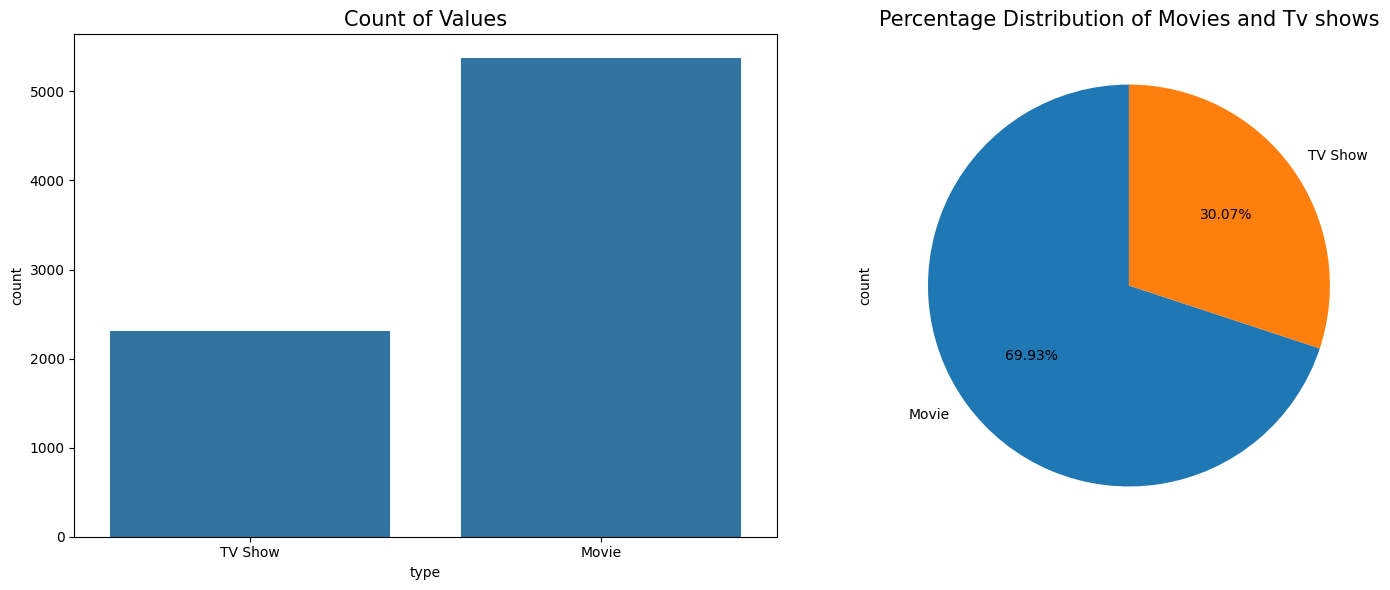

In [35]:
fig,ax = plt.subplots(1,2, figsize=(10,8))

# countplot
graph = sns.countplot(x = 'type', data = data, ax=ax[0])
graph.set_title('Count of Values', size=15)

# piechart
data['type'].value_counts().plot(kind='pie', autopct='%1.2f%%',ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution of Movies and Tv shows', size=15)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked 'count plot' because it's an effective way to visualize the distribution of categorical data. In this case, it allows us to compare the counts of 'Movie' and 'TV Show' in the 'type' column, addressing the objective of understanding the distribution of content types
And 'piechart'is also used for the same as it helps to visualize the percentage distribution of movie and tv shows on netflix clearly.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the number of 'Movie' entries is significantly higher than the number of 'TV Show' entries in the dataset.

This indicates that Netflix's content library is dominated by movies as movie count is 5372 with a share of 69.93% whereas tv shows count is 2310 with a share of 30.07%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The chart offers valuable insights into Netflix's content composition, aiding the company in understanding preferences and distribution. This information can inform content acquisition, advertising, and user recommendations and also there is scope to level up the tv shows content as TV Shows are less in numbers hence good opportunity for business to grab the market.

**Negative Growth Insights:**
While the chart doesn't directly indicate negative growth, it reveals potential imbalances in content distribution. For instance, if Netflix aims to focus on TV shows but movies dominate, this could be a deviation from their strategy. However, the impact depends on user preferences. If the movie-heavy library aligns with user demand and keeps subscribers engaged, it might not lead to negative growth. The key is alignment with user expectations and business goals.








#####**Column-Title**

In [36]:
# number of unique values
data['title'].nunique()

7682

####**Chart-2:Most used words in Title**

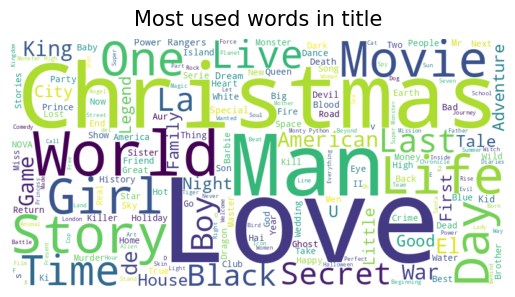

In [37]:
# text documents
text = " ".join(word for word in data['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

# plot the word cloud
plt.title('Most used words in title', fontsize = 15, pad=10)
plt.axis('off')
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

The Word Cloud visually highlights the most frequently used words in titles, offering quick insights into common themes.

##### 2. What is/are the insight(s) found from the chart?

The Word Cloud reveals the most prominent words in Netflix titles,such as 'Christmas','Love','World','Man'indicating popular themes and trends in content naming, aiding in understanding viewer interests and content focus.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights can positively impact business by identifying popular themes for content acquisition and marketing strategies.

**Negative Growth considerations:**

No negative growth insights are directly evident; however, if the dominant themes don't align with evolving user preferences, it could negatively impact subscriber engagement and retention, underscoring the need for ongoing analysis.

####**Chart-3:Top 10 director on Netflix**

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

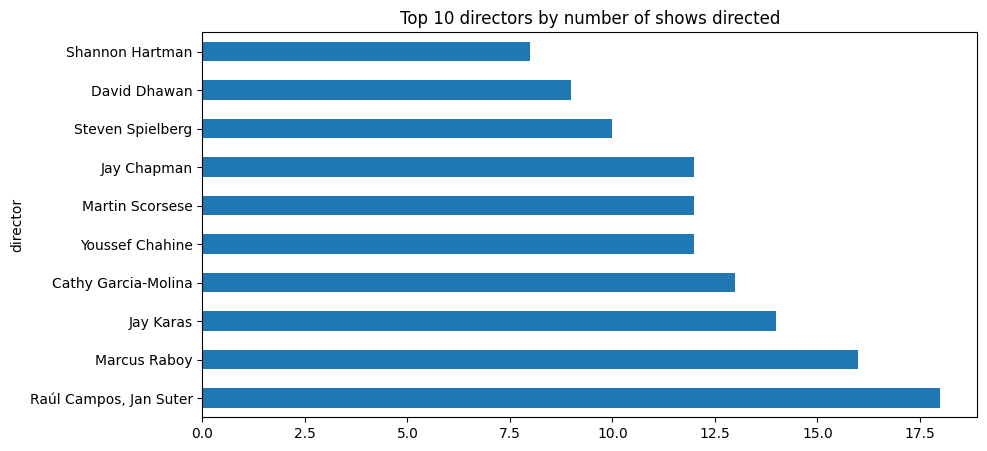

In [38]:
#Top 10 directors in the dataset
plt.figure(figsize=(10,5))
data[~(data['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

##### 1. Why did you pick the specific chart?


The horizontal bar chart is chosen for its clarity and ease of comparison, allowing for straightforward visualization of the top 10 directors by the number of shows directed.








##### 2. What is/are the insight(s) found from the chart?

The chart identifies the top 10 directors with the most shows, highlighting their prominence and potential influence in Netflix's content lineup.

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###**Chart-4:Top 10 Actors on Netflix**

Text(0.5, 1.0, 'Top 10 actors on Netflix')

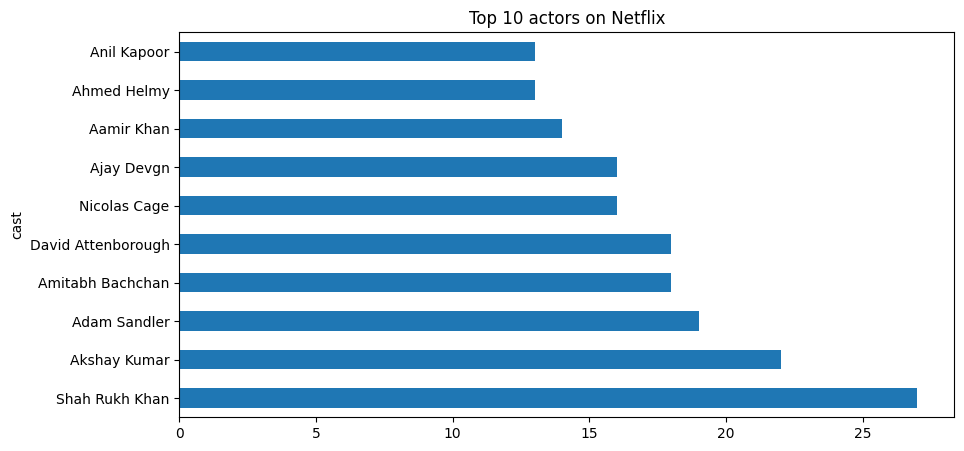

In [39]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
data[~(data['cast']=='Unknown')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 actors on Netflix')

##### 1. Why did you pick the specific chart?

The horizontal bar chart effectively compares the top 10 actors by show count, making it easy to read and analyze.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the top 10 actors appearing in Netflix TV shows, highlighting key performers who may drive viewership and indicating potential stars for future projects and marketing efforts.
And we can clearly infer that most popular actors on netflix are mainly  bollywood actors such as Shahrukh Khan,Akshay Kumar, Amitabh Bachan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

These insights can positively impact business by identifying popular actors who attract viewers, guiding casting decisions, and marketing strategies.

**Negative Growth Considerations:**

No direct negative growth insights are apparent, but over-reliance on a few actors could risk audience fatigue, underscoring the need for diverse casting to maintain interest.

###**Chart-5:Top 10 countries with highest number of movie/shows**

Text(0.5, 1.0, ' Top 10 countries with the highest number of movie/shows')

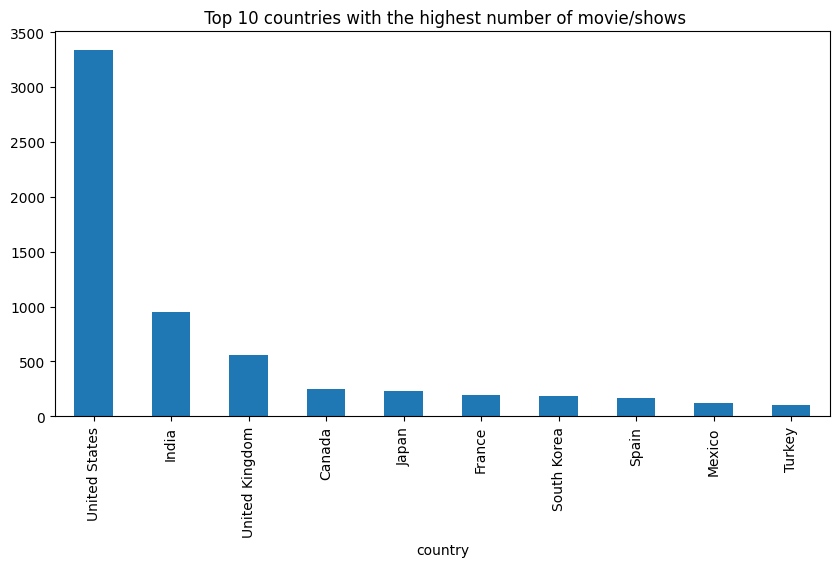

In [40]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
data['country'].value_counts().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title(' Top 10 countries with the highest number of movie/shows')

##### 1. Why did you pick the specific chart?

I picked the vertical bar chart as it clearly shows the top 10 countries by the number of movies and TV shows, making it easy to compare and analyze content production by country.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the countries with the highest production of movies and TV shows on Netflix, indicating significant content creation hubs. This insight can guide regional content strategies and partnerships with local studios.

* The **United States** is the top country producing both movies and TV shows on Netflix. This suggests that Netflix is heavily influenced by American content.

* **India** is the second-highest producer of movies on Netflix, indicating the growing popularity of Bollywood movies worldwide.

* Countries like  UK, canada, france, japan also have significant presence in the data set showing diversity of content on the netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into the top countries for content production can positively impact Netflix by guiding localized content strategies and partnerships.

**Negative Growth Considerations:**

However, focusing too heavily on certain regions could lead to negative growth if it limits content diversity and fails to cater to global audience preferences, potentially reducing subscriber satisfaction and retention.

#####**Column-release year**

In [41]:
print(f'Oldest release year : {data.release_year.min()}')
print(f'Latest release year : {data.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


###**Chart-6:Distribution by released year**

Text(0.5, 1.0, 'distribution by released year')

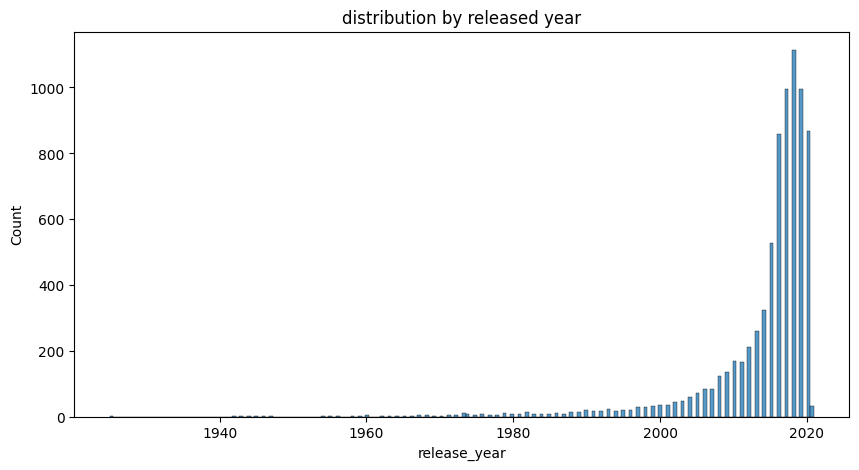

In [42]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(data['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

The histogram plot is ideal as it visually represents the distribution of release years for movies and TV shows, making it straightforward to observe trends in content production over time and identify periods of higher or lower activity.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the distribution of release years for Netflix content, showing periods of high and low production activity.
Netflix showcases a larger quantity of new movies and TV shows compared to older content.
* The total number of shows exhibits a noticeable upward trend, with a significant increase commencing around the year 2000.
* The peak in the number of shows is observed in 2018, indicating a substantial surge in content production during that year.
* There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
* We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into the distribution of release years can positively impact business as understanding trends can help Netflix capitalize on nostalgia, target specific audience demographics, and ensure a balanced content library.

**Negative Growth Considerations:**

 If the distribution shows a decline in recent years without corresponding adjustments in content strategy, it could lead to negative growth due to outdated or less appealing content offerings, affecting viewer engagement and retention.








###**Chart-7:Popular Ratings On Netflix**

<Axes: title={'center': 'Popular Ratings on Netflix'}, xlabel='rating', ylabel='count'>

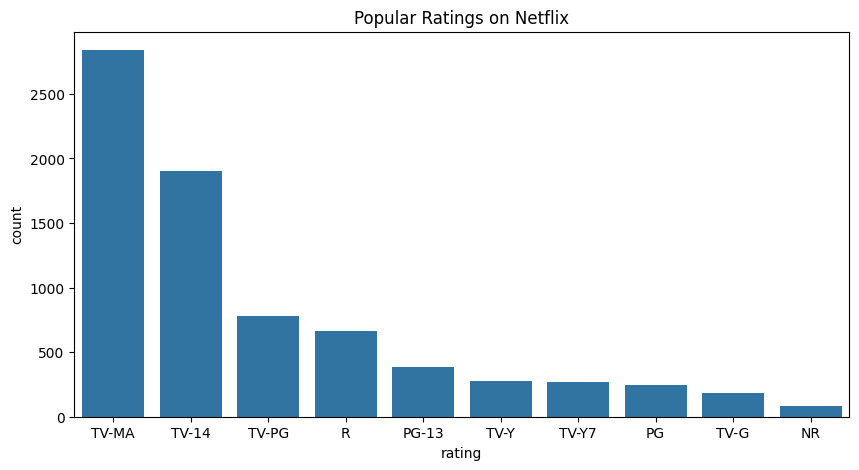

In [43]:
#Visualizing Popular Ratings on Netflix
plt.figure(figsize=(10,5))
plt.title('Popular Ratings on Netflix')
sns.countplot(x="rating", data=data, order=data['rating'].value_counts().index[0:10])

##### 1. Why did you pick the specific chart?

The count plot effectively displays the distribution of ratings, highlighting the popularity of different content ratings on Netflix, aiding in understanding viewer preferences and guiding content acquisition strategies.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the distribution of ratings for Netflix content, indicating the popularity of different content ratings among viewers.

TV-MA and TV-14 being the most popular rating on Netflix guides that Adult and Teen content on Netflix is dominant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into popular ratings can positively impact business by guiding content selection and creation to align with viewer preferences.

**Negative Growth Considerations:**

However, overemphasis on specific ratings without diversity may limit content appeal across demographics, potentially reducing subscriber engagement. Balancing content diversity with popular ratings is crucial for sustained audience satisfaction and business growth.

###**Chart-8:Count and Distribution of content by age_group**

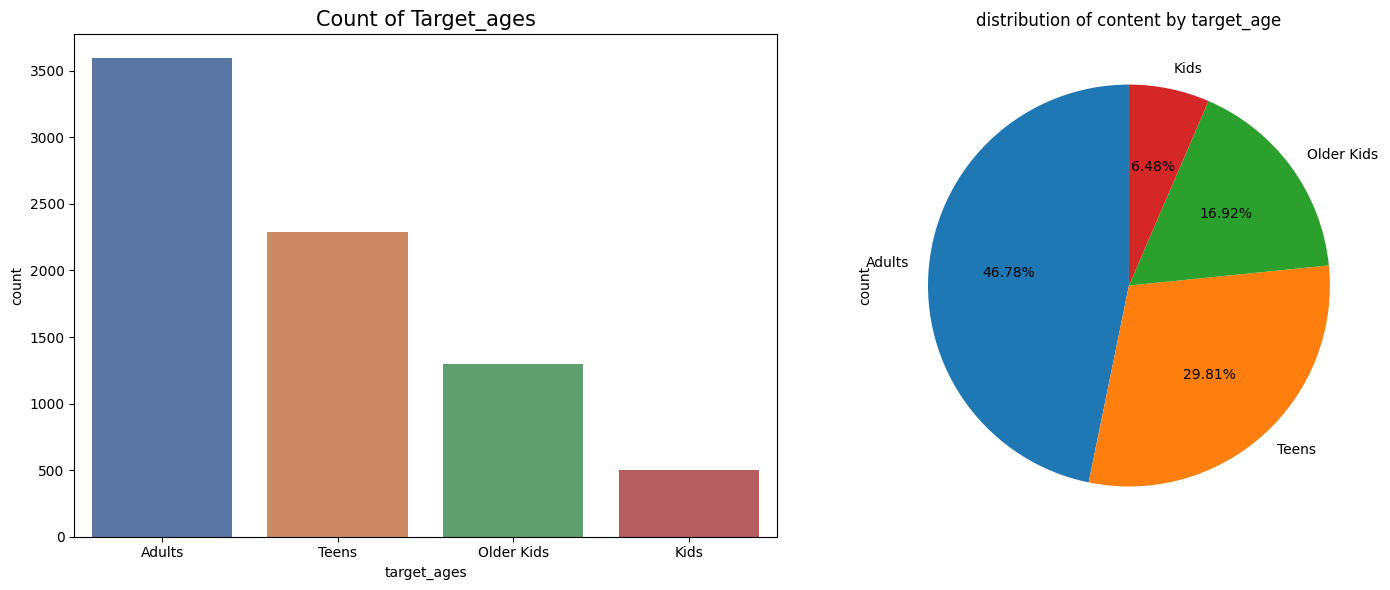

In [44]:
# Visualizing Count and distribution of content by target_age
fig,ax = plt.subplots(1,2, figsize=(10,8))
#countplot
graph=sns.countplot(x='target_ages',data=data,palette='deep',ax=ax[0])
graph.set_title('Count of Target_ages', size=15)
# piechart
data['target_ages'].value_counts().plot(kind='pie', autopct='%1.2f%%',ax=ax[1], figsize=(15,6),startangle=90)
plt.title('distribution of content by target_age')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This combination of a count plot and a pie chart effectively compares the distribution of target ages for Netflix content.

The count plot provides a clear numerical breakdown, while the pie chart offers a visual percentage representation, aiding in both detailed analysis and overall understanding of age group preferences.

##### 2. What is/are the insight(s) found from the chart?

Approximately 50% of the shows on Netflix are tailored for adult audiences, making it the largest segment.

Older kids, and Teens are the subsequent target age groups with varying proportions of content.

However, compared to other age categories, Netflix offers a relatively smaller number of shows explicitly created for Kids


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Understanding the distribution of target age groups can positively impact business by tailoring content and marketing strategies to appeal to specific demographics.

**Negative Growth Considerations:**

However, if content disproportionately targets one age group at the expense of others, it may alienate potential subscribers outside that demographic, potentially leading to reduced growth and diversity in audience engagement.

###**Chart-9:Top10 genres**

Text(0.5, 1.0, 'Top 10 genres')

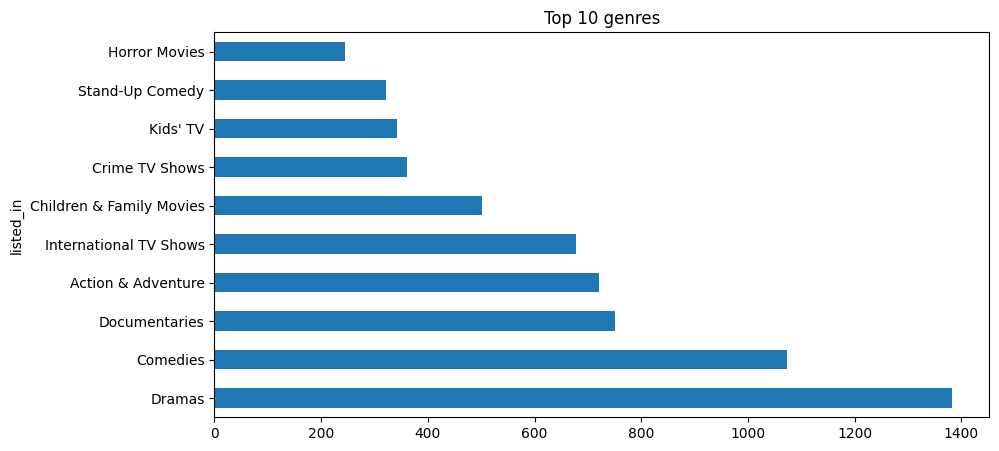

In [45]:
# Top 10 genres
plt.figure(figsize=(10,5))
data.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [46]:
# Share of top 3 genres
data.listed_in.value_counts().nlargest(3).sum()/len(data)*100

41.7599583441812

##### 1. Why did you pick the specific chart?

The horizontal bar chart effectively compares and visualizes the top 10 genres by count, making it easy to identify the most popular genres.

##### 2. What is/are the insight(s) found from the chart?

* The dramas is the most popular genre followed by comedies and documentaries.
* These three genres account for about 41% of all movies and TV shows.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into popular genres can positively impact business by informing content creation and acquisition decisions that cater to viewer preferences.

**Negative Growth Considerations:**
However, over-reliance on certain genres without diversification may limit audience appeal and lead to reduced subscriber retention, especially if viewer tastes shift or competitors offer more varied content options.








###**Chart-10:Most used words in Description**

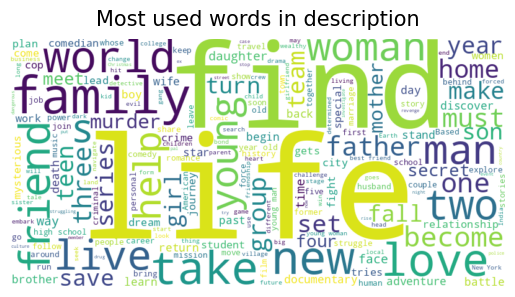

In [47]:
# text documents
text = " ".join(word for word in data['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

# plot the word cloud
plt.title('Most used words in description', fontsize = 15, pad=10)
plt.axis('off')
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud effectively visualizes frequent words in descriptions, aiding in quick thematic insights for content analysis and strategy.

##### 2. What is/are the insight(s) found from the chart?

The word cloud highlights the most frequent words in Netflix descriptions such as Find, Family, Friend, Love and New , revealing common themes and topics that resonate with viewers. Insights include understanding popular genres, themes, and content focuses driving viewer engagement and preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Yes, insights from the word cloud can positively impact business by guiding content creation and marketing strategies based on popular themes and viewer interests.

**Negative Growth Considerations:**

However, if common themes indicate saturation or lack of diversity in content offerings, it may lead to reduced viewer engagement and potential negative growth if not addressed with fresh and varied content.








###**Chart-11:Shows Added each month**

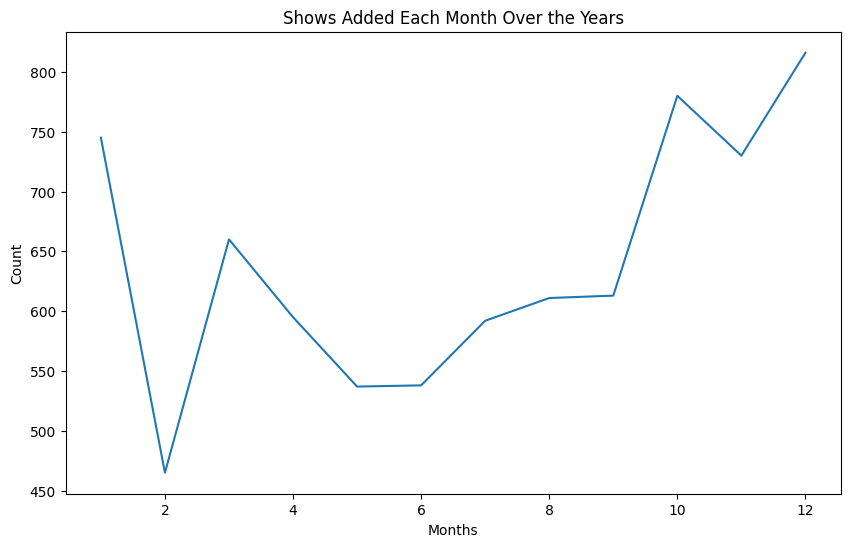

In [50]:
#number of shows added on different months
plt.figure(figsize=(10, 6))
data['month_added'].value_counts().sort_index().plot(kind='line')
plt.title('Shows Added Each Month Over the Years')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The line plot effectively shows the trend in the number of shows added each month over time, providing insights into seasonal trends and overall content distribution patterns across different months.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates the fluctuation in content additions across months, revealing periods of higher and lower activity.

The peak months for content release were mainly from **October to January** ( **December** being the most suitable month for adding any new content) as it's the timeperiod of festivals celebrations and vacations thus,it helps in  planning strategic content launches to optimize viewer engagement and retention.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights gained can help Netflix create a positive business impact by identifying the most popular months for new content additions. This can help Netflix plan content releases during peak periods, leading to increased user engagement and retention.

**Negative Growth Considerations:**
The insight that February is the least popular month for new content additions could potentially lead to negative growth if Netflix does not maintain a consistent flow of new content during this period. It is important for Netflix to keep its audience engaged throughout the year to avoid dissatisfaction and potential loss of subscribers.

###**Chart-12:Shows Added each Year**

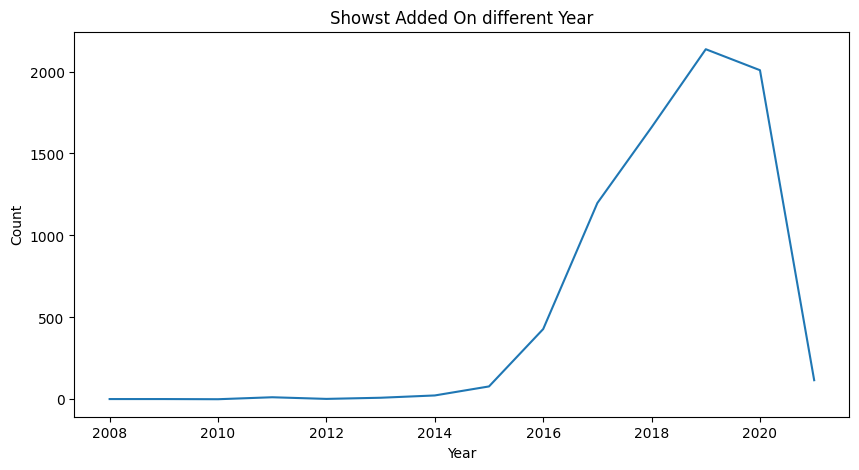

In [51]:
#number of shows added on different Year
plt.figure(figsize=(10, 5))
data['year_added'].value_counts().sort_index().plot(kind='line')
plt.title('Showst Added On different Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

This line plot effectively displays the trend in content additions over different years, allowing for clear visualization of growth or changes in Netflix's content library over time.

##### 2. What is/are the insight(s) found from the chart?

We can see that the number of movies and TV shows added on Netflix has been increasing steadily every year. But since 2018, the content on Netflix has been significantly increased,also it shows a major dip in the year 2020 mainly due to the covid-19 pandemic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into yearly content additions can inform strategic decisions like budget allocation and content planning. Positive impacts include aligning investments with growth periods.

**Negative Growth Considerations:**
However, if there's a decline in yearly additions, it may signal saturation or reduced investment, potentially leading to stagnation in content diversity and viewer engagement, impacting business growth negatively.

###**Chart-13:Popular Genre of Tv shows and Movies**

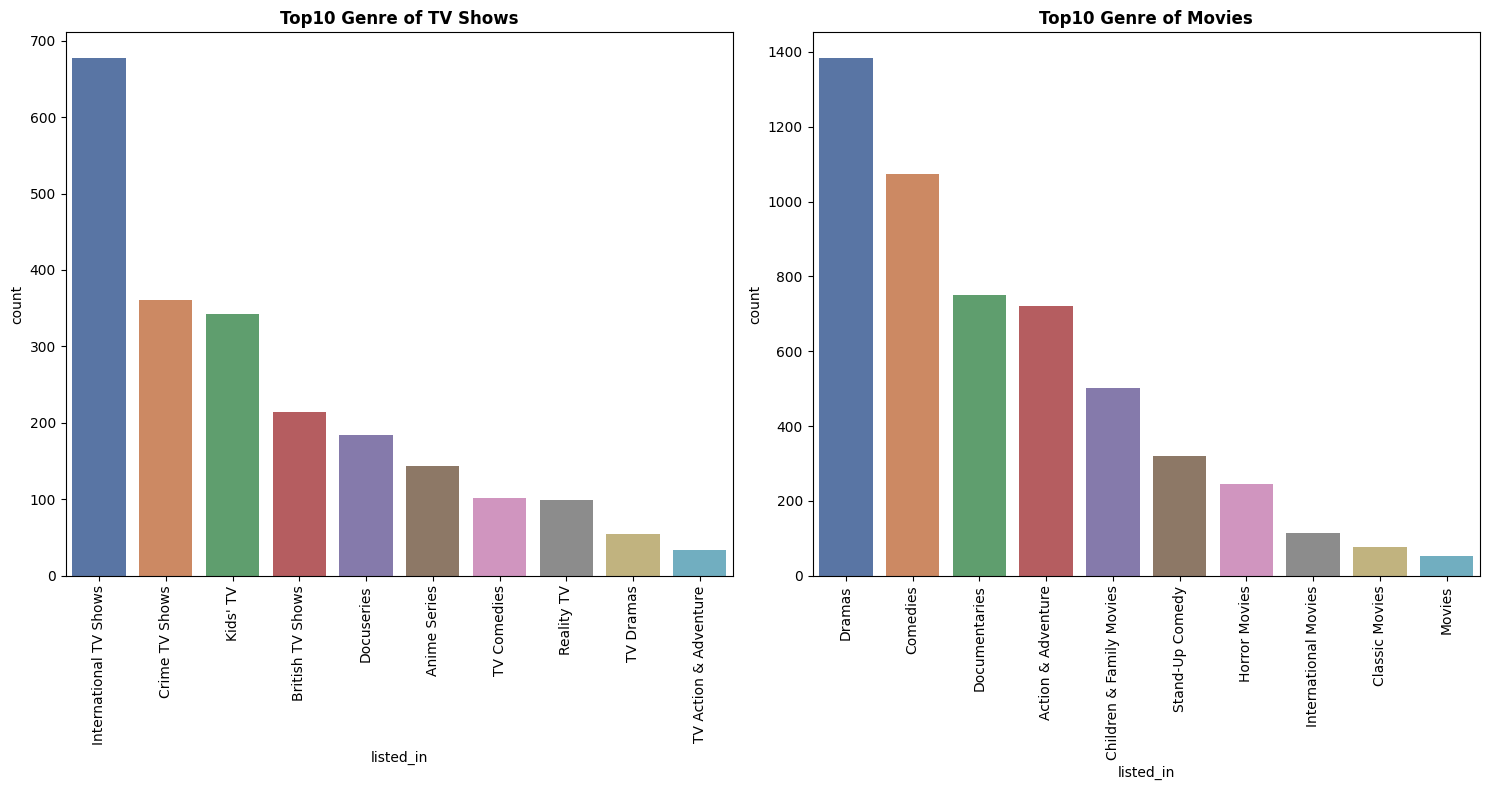

In [52]:
#creating two extra columns
tv_shows=data[data['type']=='TV Show']
movies=data[data['type']=='Movie']

fig,ax = plt.subplots(1,2, figsize=(15,8))

#Analysing top10 genres of TVSHOWS
top=sns.countplot(x=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10],palette='deep',ax=ax[0])
top.set_title('Top10 Genre of TV Shows',fontweight="bold")
plt.setp(top.get_xticklabels(), rotation=90)

#Analysing top10 genre of the movies
bottom=sns.countplot(x=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],palette='deep',ax=ax[1])
bottom.set_title('Top10 Genre of Movies',fontweight="bold")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart layout effectively compares the top 10 genres between TV shows and movies side by side. It provides a clear visual comparison of genre popularity within each content type, aiding in understanding genre preferences across different formats and informing strategic content acquisition and production decisions.

##### 2. What is/are the insight(s) found from the chart?

InternationalTvshows  genre is most popular in  the TV Shows followed by CrimeTvshows and Kids'Tv and

In Movies category Dramas,comedies and documentaries are the most popular genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights gained can have a positive impact on Netflix's business by helping the platform understand what genres and types of content are popular with its audience. This information can help Netflix tailor its content acquisition and production strategies to better cater to the preferences of its viewers, which can lead to increased engagement and customer satisfaction.

**Negative Growth Considerations:**

However, if there's over-reliance on specific genres that decline in popularity or fail to resonate with viewers, it may lead to reduced engagement and negative growth in subscriber retention and satisfaction.








###**Chart-14:Popular tv shows and movie actors**

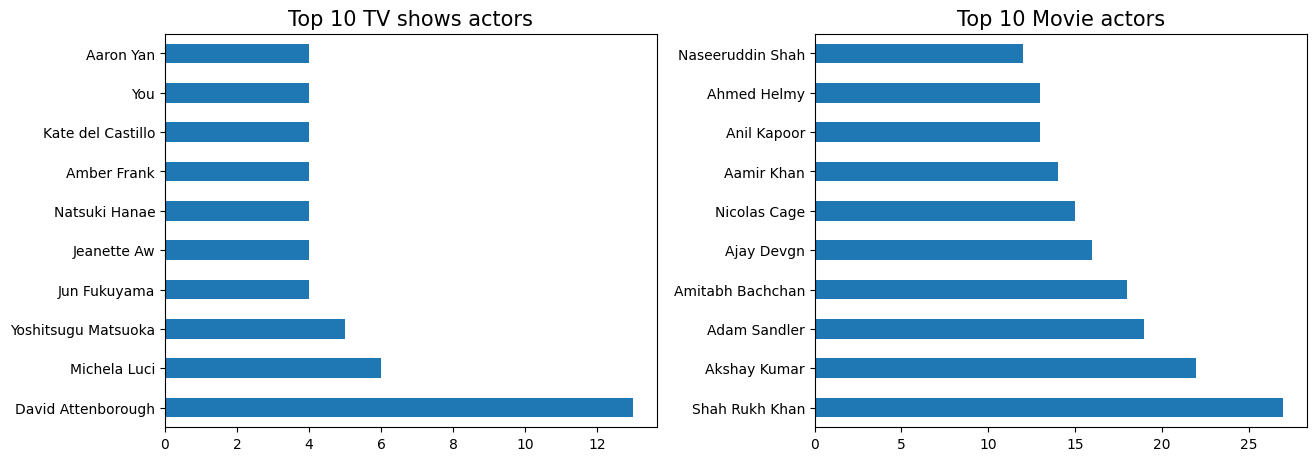

In [53]:
fig,ax = plt.subplots(1,2, figsize=(14,5))
data = data[data['cast'] != 'Unknown']
# seperating TV shows actor from cast column
top_TVshows_actor = data[data['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = data[data['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

This dual bar chart setup effectively compares the top 10 actors for TV shows and movies, providing insights into the most frequently featured actors in each category

##### 2. What is/are the insight(s) found from the chart?

Insights include identifying influential actors for viewer attraction, potentially guiding casting and content creation strategies to maximize viewer engagement.

We found an interesting insight that most of the Actors in Movies are from **India**.

No popular actors from India in TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into top actors for TV shows and movies can positively impact business by informing casting decisions and marketing strategies that capitalize on popular actor appeal.

**Negative Growth Considerations:**

However, over-reliance on a few actors may limit content diversity and fail to cater to broader audience tastes, potentially leading to reduced engagement and negative growth.








###**Chart-15:Top 10 countries with the highest number of movie/shows**

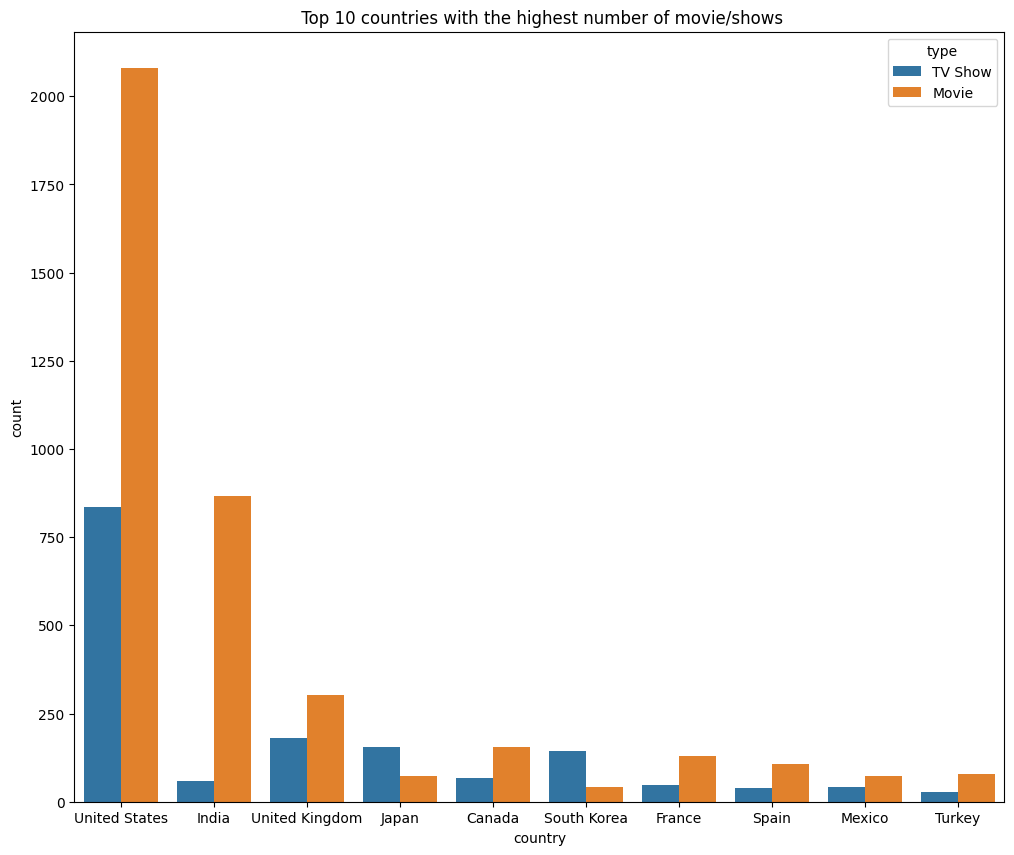

In [54]:
plt.figure(figsize=(12,10))
sns.countplot(x="country", data=data, hue='type', order=data['country'].value_counts().index[0:10])
plt.title(' Top 10 countries with the highest number of movie/shows')
plt.show()


##### 1. Why did you pick the specific chart?

This stacked count plot effectively compares the top 10 countries by the number of movies and TV shows on Netflix, showing the distribution of content types within each country to understand global content production trends.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the distribution of movies and TV shows across the top 10 countries with the highest content production on Netflix. Insights include identifying leading countries in content creation and understanding regional preferences for different types of content.

Since Netflix is an American subscription streaming service and production company.This suggests that Netflix is heavily influenced by American content.Therefore United States is the top country producing both movies and TV shows on Netflix.

India is the second-highest producer of movies on Netflix, indicating the growing popularity of Bollywood movies worldwide.

Countries like  UK, Japan and Canada, also have significant presence in the data set showing diversity of content on the netflix.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into content distribution by country can positively impact business by guiding localization strategies and content acquisition decisions based on regional preferences.

**Negative Growth Considerations:**

However, if content distribution heavily favors specific countries without reflecting global diversity, it may limit appeal to international audiences, potentially leading to reduced growth and subscriber engagement in untapped markets.

###**Chart-16:Top 10 countries by ratings with target_ages count**

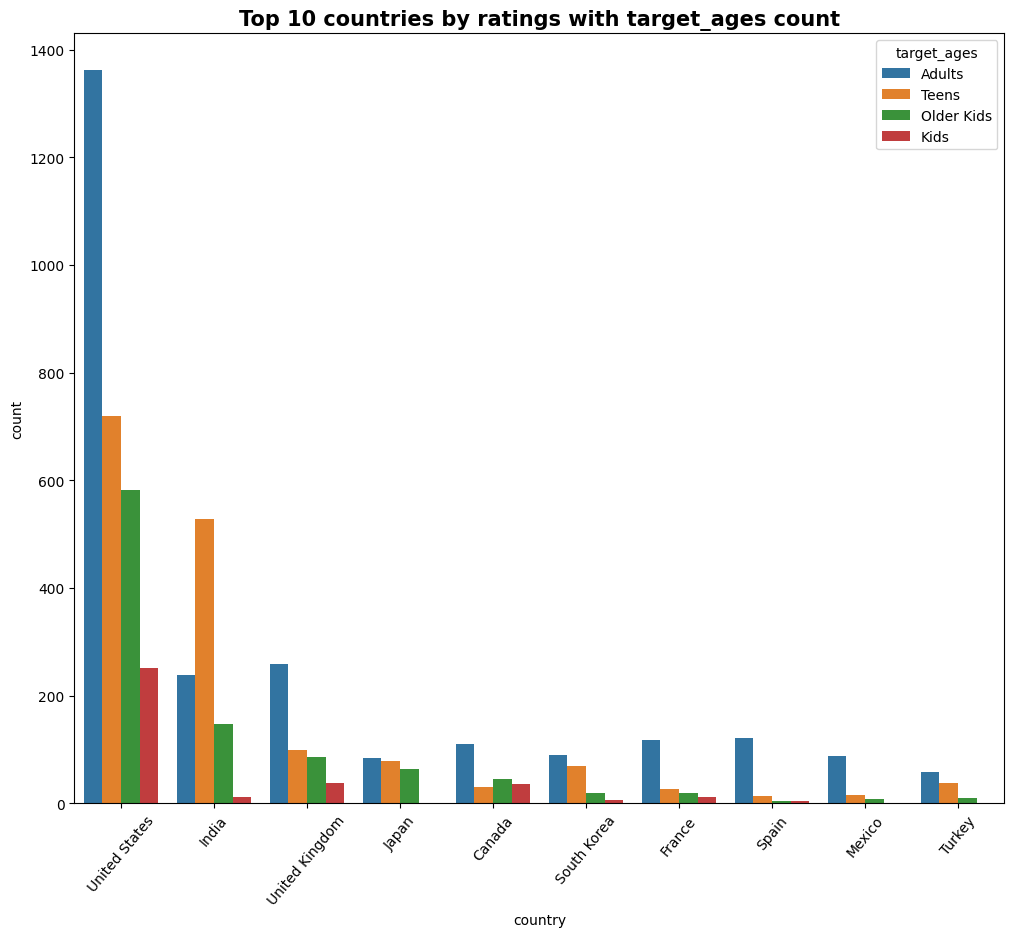

In [55]:
#Analysing Top 10 countries with most content by target_ages
plt.figure(figsize=(12,10))
sns.countplot(x=data['country'], order=data['country'].value_counts().index[0:10], hue=data['target_ages'])
plt.xticks(rotation=50)
plt.title('Top 10 countries by ratings with target_ages count', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to visually compare the distribution of target ages across the top 10 countries, highlighting age-specific content trends.










##### 2. What is/are the insight(s) found from the chart?

The chart reveals which countries produce the most content and the age groups they target.

Notably, certain countries dominate specific age groups, indicating market preferences or regulatory influences as united states and India makes content targeting adult and teens.

Notably, UK ,Japan and other countries too have major focus on adult and teen content and having little or very less content creation targeting older kids and kids.

This distribution can guide content creators and marketers in targeting appropriate demographics based on regional content trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights can drive positive business impact by informing targeted content strategies and regional marketing efforts, aligning with audience preferences.

**Negative Growth Considerations:**

However, over-concentration on specific age groups in certain countries may limit audience diversity and potential growth, risking market saturation and neglecting untapped demographics. Balancing content diversity is crucial.








###**Chart-17:Charting the Most Productive Years in Film and TV Releases**

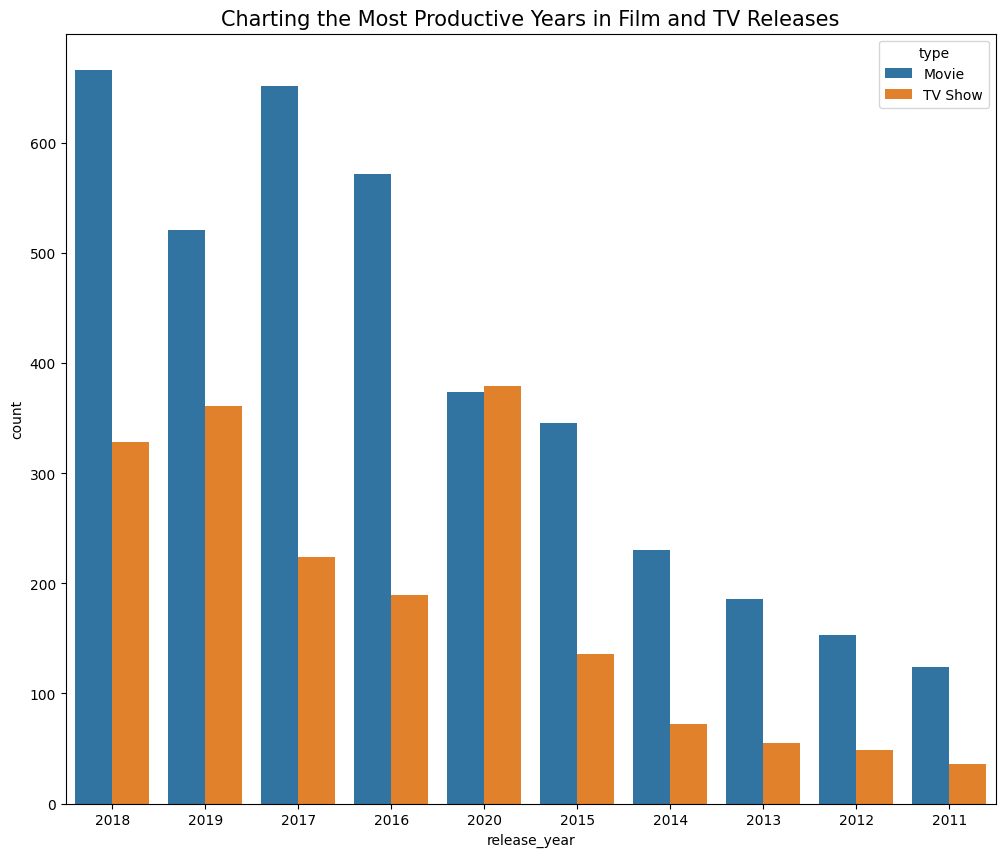

In [56]:
plt.figure(figsize=(12,10))
count = sns.countplot(x="release_year", hue='type', data=data, order=data['release_year'].value_counts().index[0:10])
count.set_title('Charting the Most Productive Years in Film and TV Releases', size=15)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to clearly compare the number of movies and TV shows released each year, highlighting trends effectively.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can clearly see that the entertainment industry has hiked it's content creation game as each year starting from 2011 the numbers have increased immensley and it seen its peak period from 2016 to 2018 and the drop in numbers in  year 2019 and 2020 is mainly due to covid-19 pandemic.Otherwise we can infer that it is flourishing more and more every year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

These insights clearly shows that content creation has increased with each coming year catering to the peoples growing  interest towards movie and tv shows.So the businesses should plan their realeses every year strategically with proper planning and current trends and moods of audiences.

**Negative Growth Considerations:**

However, an overreliance on past trends may stifle innovation and lead to market saturation. Balancing data-driven strategies with creative ventures ensures sustained growth and adaptation to changing audience preferences.

###**Chart-18:Number of movies and TV shows added over the years**

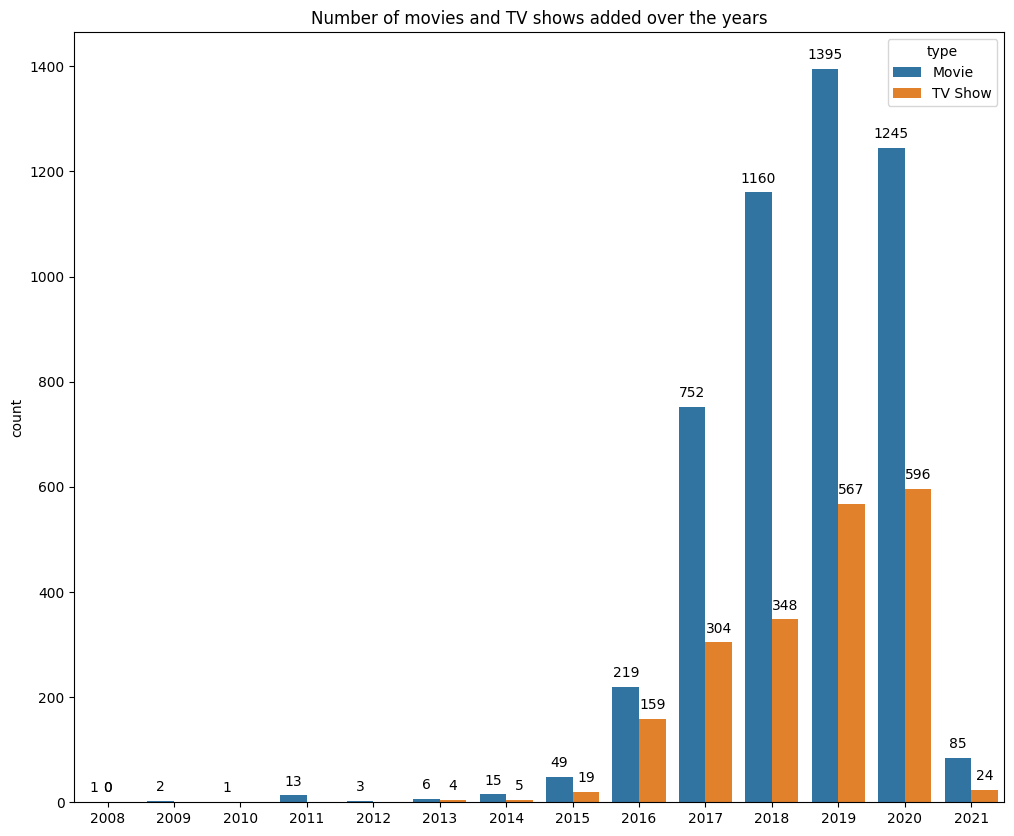

In [57]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(12,10))
p = sns.countplot(x='year_added',data=data, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


##### 1. Why did you pick the specific chart?

I chose a countplot to visualize trends in movie and TV show additions over years, effectively comparing their distribution.


##### 2. What is/are the insight(s) found from the chart?

The peak years of content additions for movies and TV shows were from 2017-2020 which can indicate periods of high production or strategic content releases.

There was a dip in year 2021 possibly due to covid-19 pandemic.

Differences in trends between movie and TV show additions may also suggest shifts in audience preferences or industry dynamics over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights can positively impact business strategy by informing decisions on content acquisition, production scheduling, and marketing campaigns based on historical trends.

**Negative Business Considerations:**
However, if trends show declining additions in recent years, it could indicate saturation or changing audience interests, prompting the need for innovation or diversification to sustain growth.








###**Chart-19:Number of movies and tv shows released each year since 2008 that are on Netflix**

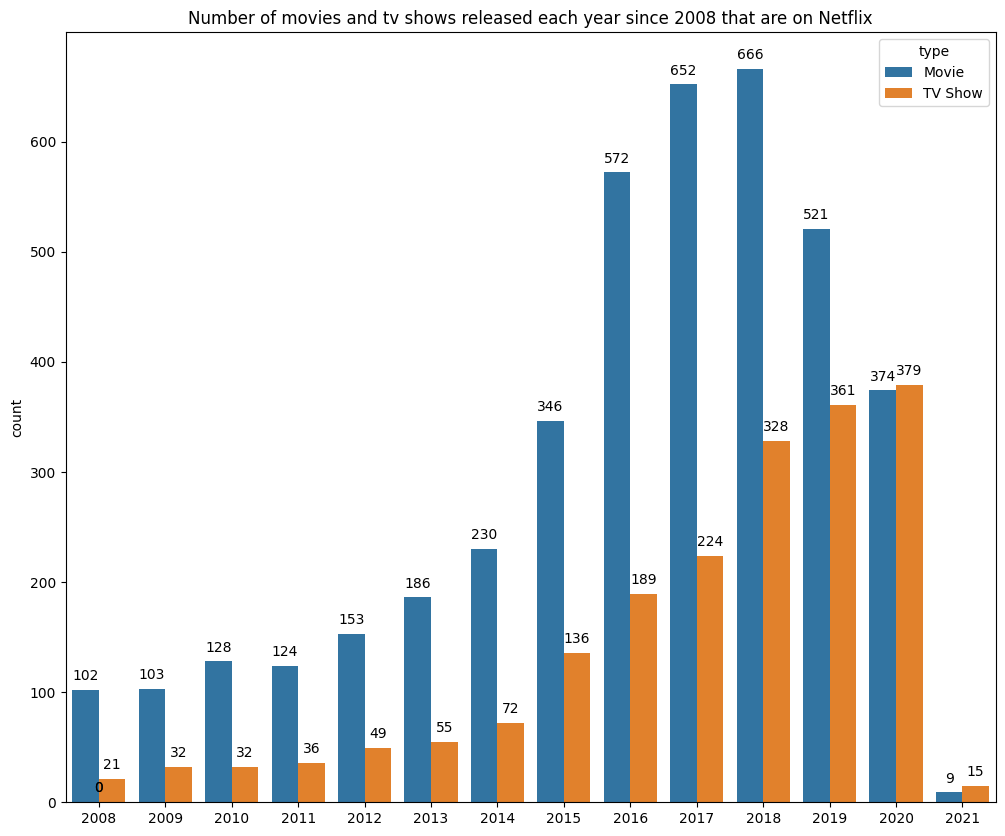

In [58]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(12,10))
p = sns.countplot(x='release_year',data=data, hue='type', order = order)
plt.title('Number of movies and tv shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


##### 1. Why did you pick the specific chart?

I chose a countplot to visualize the number of movies and TV shows released each year since 2008, segmented by type (movies and TV shows), to highlight annual production trends on Netflix.








##### 2. What is/are the insight(s) found from the chart?

From the chart, insights include identifying trends in Netflix content production since 2008, showing fluctuations and growth patterns in both movies and TV shows.

2017, 2018 and 2019 were peak years of production and till that time more number of movies were released than tv shows.

From 2020 there was a potential shifts in focus between movie and TV show releases, which suggests that people intrests is growing more towards tv shows.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights can guide positive business impact by informing strategic decisions on content acquisition, production planning, and marketing efforts aligned with historical trends.

**Negative Growth Considerations:**

However, a decline in releases in recent years may suggest market saturation or shifting audience preferences, necessitating adaptation strategies to avoid negative growth and maintain relevance in the competitive landscape.

###**Chart-20:Number of Movies and Tv shows added each month**

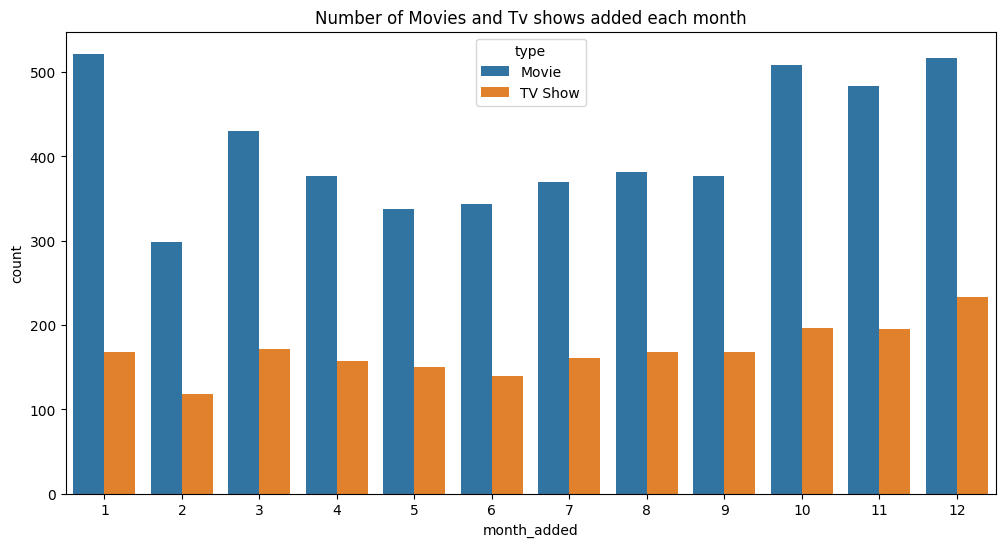

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='month_added', hue='type', data=data)
plt.title("Number of Movies and Tv shows added each month")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to compare the monthly additions of movies and TV shows, providing a clear visual representation of their distribution over time.


##### 2. What is/are the insight(s) found from the chart?

From the chart, insights include identifying seasonal patterns or trends in the addition of movies and TV shows on Netflix. It reveals October, November and December has higher  releases, potentially reflecting strategic content scheduling, viewer behavior shifts by season, or external factors like holidays influencing release patterns.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights can positively impact business strategies by optimizing content release schedules to align with peak viewing periods or capitalize on seasonal trends.

**Negative Growth Considerations:**

However, if certain months consistently show low additions, it might indicate missed opportunities for audience engagement or strategic content planning, potentially leading to negative growth if not addressed effectively.








###**Chart-21:Number of seasons per TV show distribution**

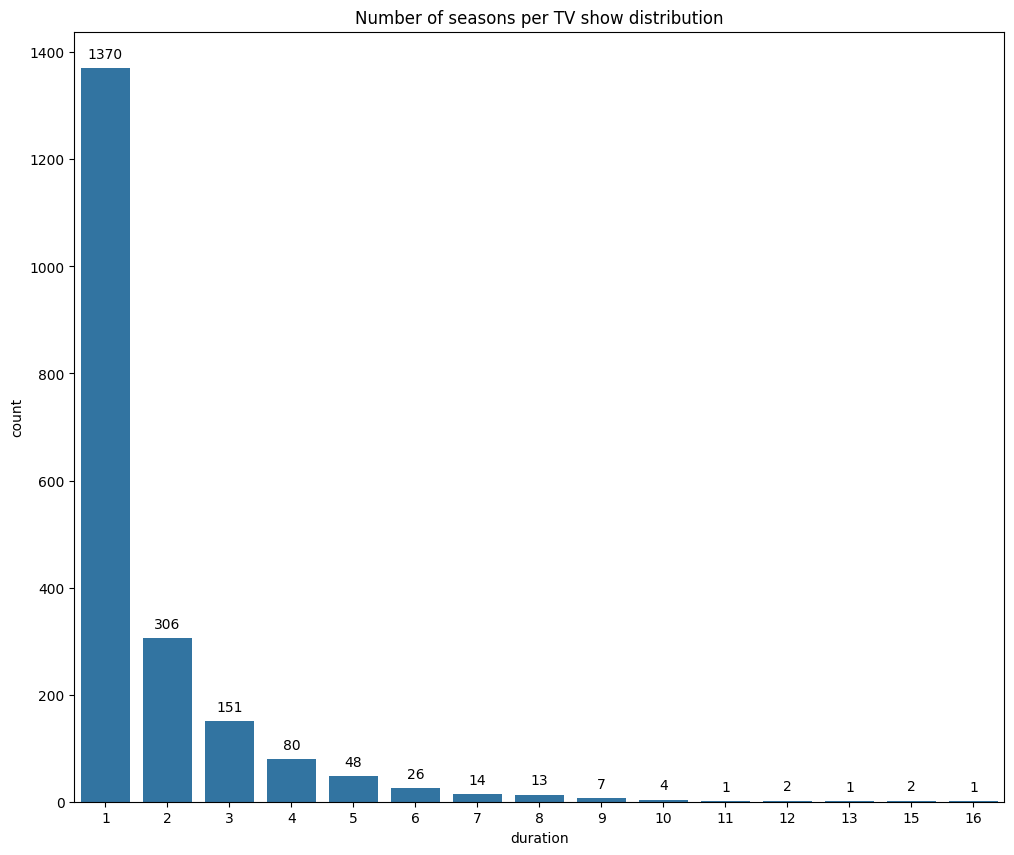

In [60]:
# Seasons in each TV show
plt.figure(figsize=(12,10))
p = sns.countplot(x='duration',data=data[data['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


##### 1. Why did you pick the specific chart?

I chose a countplot to visualize the distribution of TV show seasons, providing a clear overview of how many seasons are common among Netflix TV shows.









##### 2. What is/are the insight(s) found from the chart?

From the chart, insights include understanding the typical distribution of TV show seasons on Netflix. It shows most shows have a single-season releases versus multi-season series.

This insight suggests that viewer prefers, a low content longevity of around 1-4 seasons maximum rather than 8-16 seasons of a show on an average.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into TV show season distribution can positively impact business by informing content acquisition strategies and viewer engagement initiatives.

**Negative Growth Considerations:**

However, an over-reliance on single-season shows might limit long-term viewer retention and engagement, potentially leading to negative growth if not balanced with diverse content offerings and sustainable audience interest in multi-season series.

###**Chart-22:Movie duration distribution**

Text(0.5, 1.0, 'Movie duration distribution')

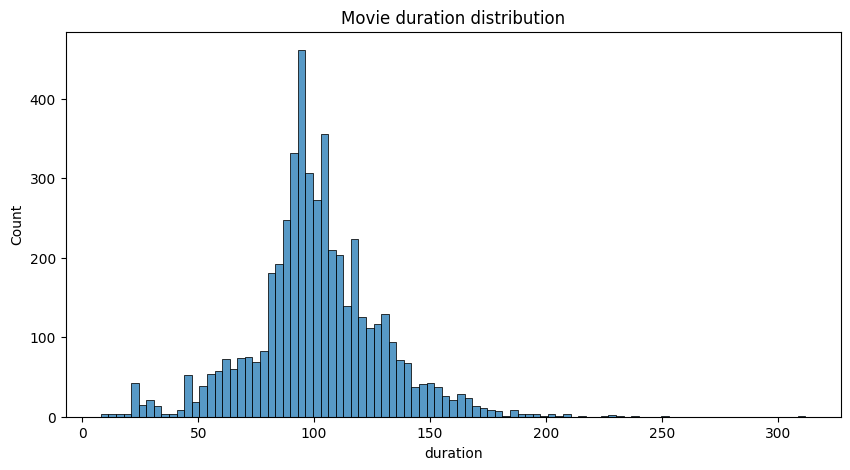

In [61]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=data[data['type']=='Movie'])
plt.title('Movie duration distribution')


##### 1. Why did you pick the specific chart?

I chose a histogram to visualize the distribution of movie durations, providing insights into the range and frequency of movie lengths on Netflix.









##### 2. What is/are the insight(s) found from the chart?

Based on these statistics, we can infer that the majority of the content on Netflix has a duration ranging from around 86 to 114 minutes, with an average duration of approximately 99 minutes.

It reveals there's a preference for shorter movies rather than the longer movies among viewers. This can guide content creators in tailoring film lengths to match audience expectations and optimize viewer engagement based on observed duration preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into movie duration distribution can positively impact business by aligning content creation with viewer preferences for optimal engagement.

**Negative Growth Considerations:**

However, if there's a skewed distribution towards very short or very long movies, it may limit viewer satisfaction and retention, potentially leading to negative growth due to reduced audience interest or dissatisfaction with available content options.

In [ ]:
# Movie statistics
data[data['type']== 'Movie'].duration.describe()


count    4946.00000
mean      101.15467
std        28.02371
min         8.00000
25%        88.00000
50%        99.00000
75%       116.00000
max       312.00000
Name: duration, dtype: float64

###**Chart-23:Average movie length over the years**

Text(0.5, 0, 'Year')

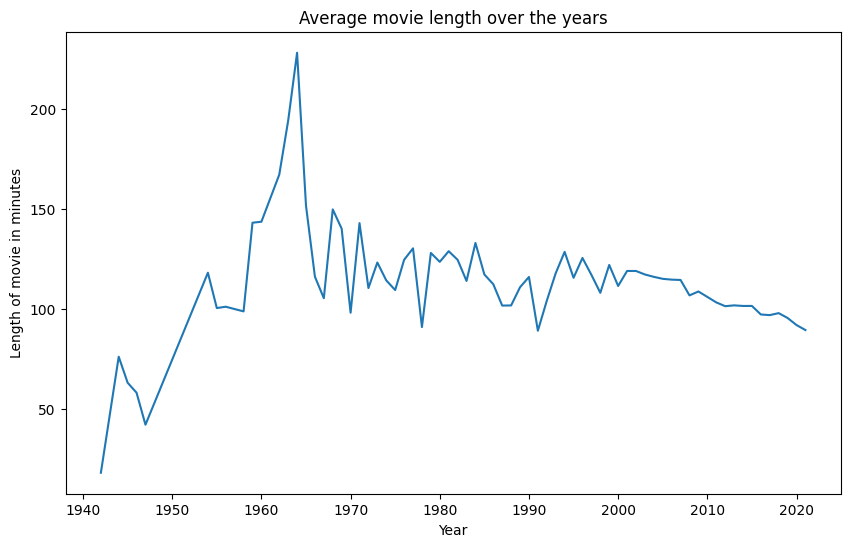

In [62]:
# Average movie length over the years
plt.figure(figsize=(10,6))
data[data['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

I chose a line plot to visualize the average length of movies over the years, highlighting trends and changes in movie durations on Netflix.

##### 2. What is/are the insight(s) found from the chart?

From the line plot, insights include understanding trends in average movie lengths on Netflix over time.

We can see that 60's and 70's were the timeperiod when longer movies were very popular.

And then there were fluctuations or trends towards shorter movies after 1965, reflecting industry shifts, audience preferences for shorter movie and content production strategies.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into average movie lengths can positively impact business by guiding content creation strategies that align with viewer preferences and market trends.

**Negative Growth Considerations:**

However, if there's a consistent trend towards shorter movies, it may limit storytelling depth or viewer satisfaction, potentially reducing audience engagement and leading to negative growth if not balanced with varied content offerings.

###**Chart-25:Proportion of Netflix Originals**

In [63]:
data_type = np.where(data['release_year'] == data['year_added'], 'Yes', 'No')
data_type_counts = pd.Series(data_type).value_counts()

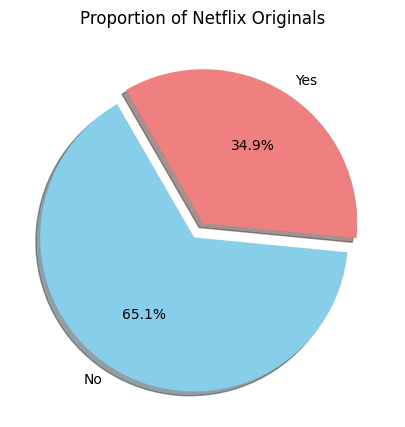

In [64]:
# Pie plot
custom_colors = ['skyblue', 'lightcoral']
data_type_counts.plot(kind='pie', autopct='%1.1f%%', explode=[0.1, 0.01], shadow=True, figsize=(10, 5), colors=custom_colors, startangle=120)
plt.title('Proportion of Netflix Originals')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart to visualize the proportion of Netflix originals based on whether the release year matches the year it was added to the platform.


##### 2. What is/are the insight(s) found from the chart?

From the pie chart, insights include understanding the proportion of Netflix originals relative to other content based on their release and addition years.

It highlights 34.9% content were released on Netflix and 65.1% content added on Netflix were released earlier by different mode.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights into the proportion of Netflix originals can positively impact business by informing decisions on content investment and platform exclusivity.

**Negative Growth  Considerations:**

However, if the proportion of originals is low, it may indicate reliance on external content providers, limiting control over content availability and potentially leading to negative growth if not balanced with a strong original content strategy.

### **Chart - 26:  Correlation Heatmap**

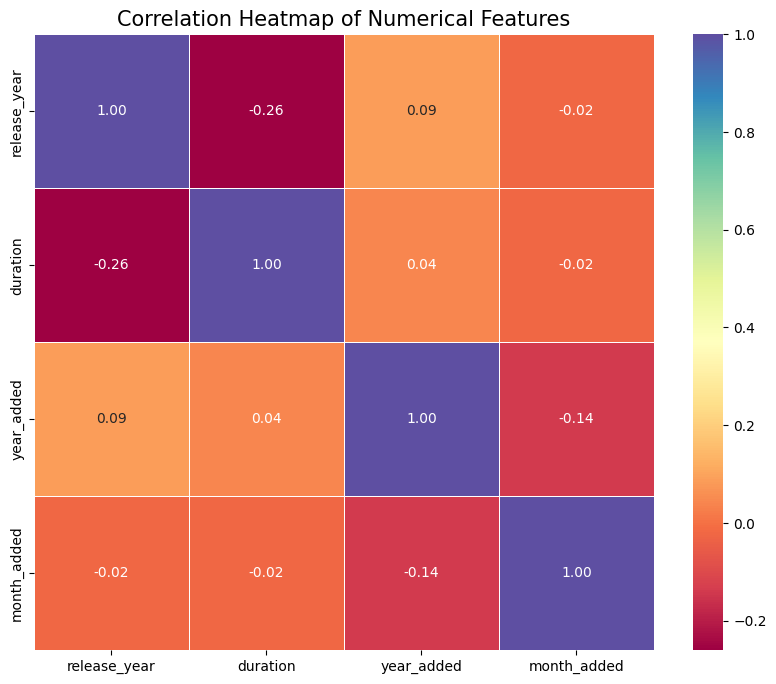

In [73]:
# Correlation Heatmap visualization code

# Select only the numerical columns
numerical_data = data.select_dtypes(include=['int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Numerical Features', fontsize=15)

# Display the heatmap
plt.show()

##### 1. Why did you pick the specific chart?

We have attributes like release year, duration, year added, and month added,so a correlation heatmap is a suitable choice to explore and understand how these temporal and numerical features interact with each other. This understanding can help in refining the clustering process or in providing context for the recommendations generated by the recommender system.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap provides insights into the relationships between the numerical features in the dataset. Here are the key insights from the chart:

1. **Release Year and Duration**: There is a moderate negative correlation (-0.26) between the release year and the duration. This suggests that more recent shows or movies tend to have shorter durations.

2. **Year Added and Release Year**: There is a small positive correlation (0.09) between the year added to Netflix and the release year. This implies that newer shows are slightly more likely to be added to Netflix.

3. **Year Added and Duration**: There is a very weak positive correlation (0.04) between the year added to Netflix and the duration, indicating almost no relationship between these variables.

4. **Month Added and Year Added**: There is a weak negative correlation (-0.14) between the month added and the year added, suggesting a slight tendency for shows added in later years to be added in earlier months.

5. **Release Year and Month Added**: There is almost no correlation (-0.02) between the release year and the month added, indicating that the month in which a show is added to Netflix does not depend on its release year.

6. **Duration and Month Added**: There is almost no correlation (-0.02) between the duration and the month added, indicating no relationship between these variables.

Overall, the correlations are relatively weak, indicating that these numerical features do not strongly influence each other. The most notable relationship is the moderate negative correlation between release year and duration.

###**Chart - 27 : Pair Plot**


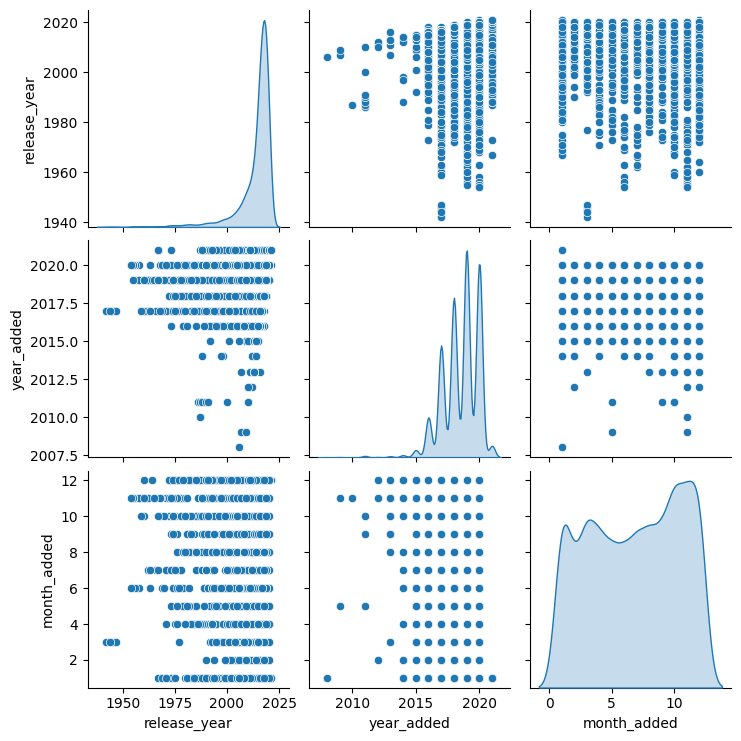

In [65]:
# Pair Plot visualization code
# Select relevant numeric columns for the pair plot
numeric_columns = ['release_year', 'year_added', 'month_added']

# Create a pair plot
sns.pairplot(data[numeric_columns], diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

Pair charts (scatter matrix) are used for analyzing relationships between pairs of variables, helping identify patterns, correlations, and potential outliers in multivariate data, enabling a quick visual exploration of data complexity.

##### 2. What is/are the insight(s) found from the chart?

The pairplot provides scatter plots and distribution plots for numerical features. Key insights include:

1. **Release Year and Year Added**:
   - Most recent content added to Netflix (post-2010) spans a wide range of release years, with a concentration from 2000 onwards.
   - A sharp increase in shows added to Netflix is seen starting around 2015, peaking in 2018-2019.

2. **Release Year and Month Added**:
   - Content is added uniformly throughout the year, regardless of the release year.

3. **Year Added and Month Added**:
   - Netflix adds content consistently throughout the year, without significant monthly variation.

4. **Distribution of Release Year**:
   - There is a sharp increase in content released after 2000, with a spike around 2020, indicating most content is recent.

5. **Distribution of Year Added**:
   - Shows added to Netflix increased sharply starting around 2015, peaking around 2018-2019.

6. **Distribution of Month Added**:
   - Content is added fairly consistently throughout the year, with minor fluctuations but no strong seasonal pattern.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* **Hypothetical Statement 1:** There is a significant change in the distribution of content types (TV shows and movies) over the years, reflecting Netflix's shifting focus.
* **Hypothetical Statement 2** Content on Netflix varies with Regions(countries)
* **Hypothetical Statement 3** There is a visible difference between ratings proportion of drama and comedy movies on Netflix.

### **Hypothetical Statement - 1**
There is a significant change in the distribution of content types (TV shows and movies) over the years, reflecting Netflix's shifting focus.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H0 (Null Hypothesis)**: The number of TV shows and movies available on Netflix has remained relatively stable over the years.

**H1 (Alternative Hypothesis):** The number of TV shows available on Netflix has significantly increased over the years, while the number of movies has decreased.

#### 2. Perform an appropriate statistical test.

In [66]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Load your Netflix dataset
# Replace 'type' with the actual column name containing content type information
# Replace 'added_year' with the actual column name containing release year information

# Create separate dataframes for TV shows and movies
tv_shows = data[data['type'] == 'TV Show']
movies = data[data['type'] == 'Movie']

# Calculate the annual count of TV shows and movies
tv_show_counts = tv_shows.groupby('year_added').size()
movie_counts = movies.groupby('year_added').size()

# Perform a t-test to compare the counts
t_stat, p_value = ttest_ind(tv_show_counts, movie_counts, equal_var=False)

# Set your significance level (alpha)
alpha = 0.05

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis: The number of TV shows and movies on Netflix has significantly changed over the years.')
else:
    print('Fail to reject the null hypothesis: The number of TV shows and movies on Netflix has remained relatively stable over the years.')


T-statistic: -0.7826264557589185
P-value: 0.44332728858984094
Fail to reject the null hypothesis: The number of TV shows and movies on Netflix has remained relatively stable over the years.


##### Which statistical test have you done to obtain P-Value?

 I used a two-sample independent t-test to obtain the p-value.

Why did you choose the specific statistical test?

I chose the two-sample independent t-test because it is a suitable statistical test for comparing the means of two independent groups. In this case, the two groups are TV shows and movies, and we are interested in comparing the means of their counts (the number of TV shows and movies) over the years. The t-test helps determine whether the difference in means between these two groups is statistically significant.

The null hypothesis (H0) assumes that there is no significant difference in the number of TV shows and movies over the years, while the alternative hypothesis (H1) suggests that there is a significant difference. By conducting the t-test and examining the p-value, we can decide whether to reject the null hypothesis or not. In this specific case, since the p-value is greater than the chosen significance level (alpha), we fail to reject the null hypothesis, indicating that the number of TV shows and movies on Netflix has remained relatively stable over the years.

### **Hypothetical Statement - 2**
 Content on Netflix varies with Regions(countries)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H0 (Null Hypothesis):** The type of content available on Netflix is consistent across different countries.

**H1 (Alternative Hypothesis):** There are significant differences in the type of content (movies and TV shows) available on Netflix across different countries.

#### 2. Perform an appropriate statistical test.

In [67]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Load your Netflix dataset
# Replace 'type' with the actual column name containing content type information
# Replace 'country' with the actual column name containing country information

# Create a contingency table of content type and country
contingency_table = pd.crosstab(data['type'], data['country'])

# Perform a chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Set your significance level (alpha)
alpha = 0.05

# Print the results
print(f'Chi-squared statistic: {chi2_stat}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis: There are significant differences in content type distribution across countries.')
else:
    print('Fail to reject the null hypothesis: The type of content available on Netflix is consistent across different countries.')


Chi-squared statistic: 1033.4751390386634
P-value: 1.0059277651428416e-166
Reject the null hypothesis: There are significant differences in content type distribution across countries.


##### Which statistical test have you done to obtain P-Value?



I used a chi-squared test to obtain the p-value.


##### Why did you choose the specific statistical test?



I chose the chi-squared test for independence because it's an appropriate statistical test for analyzing the relationship between two categorical variables, in this case, "content type" (TV shows and movies) and "country" (different countries where Netflix content is available).

The null hypothesis (H0) in this test assumes that there is no significant association or difference between content type and country. The alternative hypothesis (H1) suggests that there is a significant relationship or difference. By performing the chi-squared test and examining the p-value, we can determine whether to reject the null hypothesis or not.

In this specific case, the very low p-value (close to 0) indicates that there is a significant difference in content type distribution across different countries. Therefore, we reject the null hypothesis and conclude that there are indeed significant differences in the types of content available on Netflix across various countries.

### **Hypothetical Statement - 3**
There is a visible difference between ratings proportion of drama and comedy movies on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H0(Null Hypothesis):** There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**H1(Alternative Hypothesis)**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = data[data['listed_in'].str.contains('Dramas') | data['listed_in'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['listed_in'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['listed_in'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis:There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.")
else:
    print(f"Fail to reject the null hypothesis:There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.")


z-statistic:  7.2637793463186995
p-value:  3.7642187343372023e-13
Reject the null hypothesis:There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.


We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.


##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.


##### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

We don't need to handle any missing values now as we have handled it prior during our EDA.

### 2. Handling Outliers

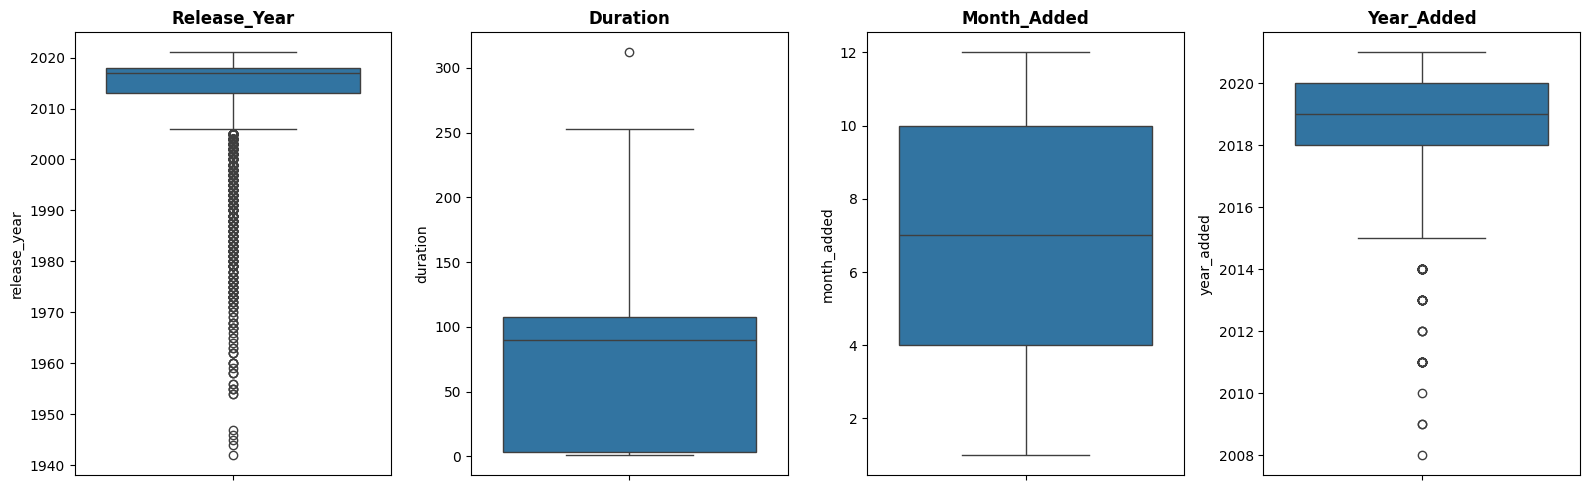

In [69]:
# Storing the continous value feature in a separate list
continous_value_feature= ["release_year","duration","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 4, n+1)
  sns.boxplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Although we have some of the anomalies in continous feature but we will not treat by considering outliers as some of the Movies/TV Shows has released or added early on Netflix.

As we gone through data thoroughly during EDA process so i can say that initial release years have very few release but then production of movies increased over the years maybe due to two reasons:

Technological developement

Increase in Audience/demand/business value realisation.

Handling outliers in a text-based dataset is different from handling outliers in numerical data since text data is inherently different from numerical data.

###3. Categorical Encoding

In our project, we will do  textual preprocessing using TF-IDF vectorization, which is a form of data encoding. This step is crucial as it converts your textual data into numerical features that can be processed by clustering algorithms. Without this step, the algorithms wouldn't be able to operate on raw text effectively.
Therefore, the additional encoding might not be needed after TF-IDF vectorization.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [70]:
data['text_attributes'] = data['description']+" "+data["director"]+" "+data["listed_in"]+" "+data["type"]+" "+data["rating"]+" "+data["country"]


In [71]:
# Cross checking our result for the function created
print(data['text_attributes'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. Unknown International TV Shows TV Show TV-MA Brazil


#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Define a function to expand common contractions
#def expand_contractions(text):
    #contractions_dict = {
        #"ain't": "is not",
        #"aren't": "are not",
        #"can't": "cannot",
        #"can't've": "cannot have",
        #"'cause": "because",
        #"could've": "could have",
        #"couldn't": "could not",
        #"didn't": "did not",
        #"doesn't": "does not",
        #"don't": "do not",
        #"hadn't": "had not",
        #"hasn't": "has not",
        #"haven't": "have not",
        #"he'd": "he would",
        #"he'd've": "he would have",
        #"he'll": "he will",
        #"he'll've": "he will have",
        #"he's": "he is",
        #"how'd": "how did",
        #"how'd'y": "how do you",
        #"how'll": "how will",
        #"how's": "how is",
        #"I'd": "I would",
        #"I'd've": "I would have",
        #"I'll": "I will",
        #"I'll've": "I will have",
        #"I'm": "I am",
        #"I've": "I have",
        #"isn't": "is not",
        #"it'd": "it would",
        #"it'd've": "it would have",
        #"it'll": "it will",
        #"it'll've": "it will have",
        #"it's": "it is",
        #"let's": "let us",
        #"ma'am": "madam",
        #"mayn't": "may not",
        #"might've": "might have",
        #"mightn't": "might not",
        #"mightn't've": "might not have",
        #"must've": "must have",
        #"mustn't": "must not",
        #"mustn't've": "must not have",
        #"needn't": "need not",
        #"needn't've": "need not have",
        #"o'clock": "of the clock",
        #"oughtn't": "ought not",
        #"oughtn't've": "ought not have",
        #"shan't": "shall not",
        #"sha'n't": "shall not",
        #"shan't've": "shall not have",
        #"she'd": "she would",
        #"she'd've": "she would have",
        #"she'll": "she will",
        #"she'll've": "she will have",
        #"she's": "she is",
        #"should've": "should have",
        #"shouldn't": "should not",
        #"shouldn't've": "should not have",
        #"so've": "so have",
        #"so's": "so is",
        #"that'd": "that would",
        #"that'd've": "that would have",
        #"that's": "that is",
        #"there'd": "there would",
        #"there'd've": "there would have",
        #"there's": "there is",
        #"they'd": "they would",
        #"they'd've": "they would have",
        #"they'll": "they will",
        #"they'll've": "they will have",
        #"they're": "they are",
        #"they've": "they have",
        #"to've": "to have",
        #"wasn't": "was not",
        #"we'd": "we would",
        #"we'd've": "we would have",
        #"we'll": "we will",
        #"we'll've": "we will have",
        #"we're": "we are",
        #"we've": "we have",
        #"weren't": "were not",
        #"what'll": "what will",
        #"what'll've": "what will have",
        #"what're": "what are",
        #"what's": "what is",
        #"what've": "what have",
        #"when's": "when is",
        #"when've": "when have",
        #"where'd": "where did",
        #"where's": "where is",
        #"where've": "where have",
        #"who'll": "who will",
        #"who'll've": "who will have",
        #"who's": "who is",
        #"who've": "who have",
        #"why's": "why is",
        #"why've": "why have",
        #"will've": "will have",
        #"won't": "will not",
        #"won't've": "will not have",
        #"would've": "would have",
        #"wouldn't": "would not",
        #"wouldn't've": "would not have",
        #"y'all": "you all",
        #"y'all'd": "you all would",
        #"y'all'd've": "you all would have",
        #"y'all're": "you all are",
        #"y'all've": "you all have",
        #"you'd": "you would",
        #"you'd've": "you would have",
        #"you'll": "you will",
        #"you'll've": "you will have",
        #"you're": "you are",
        #"you've": "you have"
    }

    # Iterate over contractions dictionary and replace them in the text
    #for key, value in contractions_dict.items():
       # text = text.replace(key, value)

    #return text

# Apply the function to the "combined_text" column
#data['text_attributes'] = data['text_attributes'].apply(expand_contractions)

# The contractions in the DataFrame have been expanded

We can expand Contraction by using above code but it's not needed.

#### 2. Lower Casing

In [72]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
data['text_attributes'] = data['text_attributes'].apply(to_lower)

# Cross checking our result for the function created
print(data['text_attributes'][0])


in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. unknown international tv shows tv show tv-ma brazil


#### 3. Removing Punctuations

In [ ]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [ ]:
# Removing Punctuations from the text_attributes
data['text_attributes']= data['text_attributes'].apply(remove_punctuations)

# Checking the observation after manipulation
print(data['text_attributes'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor unknown international tv shows tv show tvma brazil


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
data['text_attributes']= data['text_attributes'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
print(data['text_attributes'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the   saved from squalor unknown international tv shows tv show tvma brazil


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import re
# Using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# displaying stopwords
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Defining stopwords
def remove_stopwords_and_whitespaces(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]

    # joining the list of words with space separator
    text = " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text


In [ ]:
# applying above function on text feature
data['text_attributes']=data['text_attributes'].apply(remove_stopwords_and_whitespaces)

#Checking the observation after manipulation
print(data['text_attributes'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor unknown international tv shows tv show tvma brazil


#### 6. Rephrase Text

We don't need to rephrase the text as the correct structure of text is quite appropriate for us to continue with the further steps of text preprocessing.

#### 7. Tokenization

In [ ]:
# Tokenization
# Loading Libraries
import nltk
nltk.download('punkt')

# Apply the tokenization to the 'tags' column of the DataFrame
data['text_attributes'] = data['text_attributes'].apply(nltk.word_tokenize)

#Checking the observation after manipulation
print(data['text_attributes'][0])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_text_attributes = data['text_attributes']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'unknown', 'international', 'tv', 'shows', 'tv', 'show', 'tvma', 'brazil']


8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
data['text_attributes']= data['text_attributes'].apply(lemmatizing_sentence)

#Checking the observation after manipulation
print(data['text_attributes'][0])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


future elite inhabit island paradise far crowded slum get one chance join saved squalor unknown international tv show tv show tvma brazil


##### Which text normalization technique have you used and why?

In this project, I employed the text normalization technique of Lemmatization. Lemmatization is the process of reducing words to their base or root form, known as a lemma. I chose Lemmatization for the following reasons:

Semantic Accuracy: Lemmatization ensures that words are transformed into their most basic, dictionary form, which is a lemma. This helps maintain the semantic accuracy of the text. For example, it reduces different inflected forms of a word to a common base, such as 'running' to 'run' or 'better' to 'good.'

Improved Information Retrieval: By reducing words to their lemmas, Lemmatization can help improve information retrieval and text understanding. It ensures that different forms of a word are recognized as the same word, leading to better search and analysis results.

Reduced Dimensionality: Lemmatization can contribute to reduced dimensionality in the text data. By mapping similar words to a common lemma, the vocabulary size decreases, making the data more manageable for analysis.

Interpretability: Lemmatized text is more interpretable because it represents the underlying meaning of words in the document. This can be especially valuable for tasks that require model interpretability or understanding the significance of certain terms in the analysis.

Compatibility with Text Vectorization: Lemmatization is compatible with text vectorization techniques like TF-IDF or Word Embeddings. It ensures that the vectors represent the meaningful aspects of the text data, not just variations of the same word.

Improved Model Performance: In some NLP tasks, Lemmatization can lead to improved model performance. It helps models focus on the essence of words, rather than being distracted by numerous inflected forms.

In summary, I chose Lemmatization as the text normalization technique for this project to enhance the quality and interpretability of the text data. It is a valuable method for capturing the semantic meaning of words and ensuring that the text is in a more analytically useful and structured form for subsequent NLP analysis.

I used Lemmatization for text Normalization, though Stemming is also good because of less computational nature but it always does not produce meaningful words. That's why I decided go with Lemmatization although it is quite slow but produces meaningful base words.


#### 9. Part of speech tagging

In [ ]:
# tokenize the text into words before POS Taging
data['pos_tags'] = data['text_attributes'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
data.head(5)

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%            Unknown    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

   release_year rating  duration               listed_in  \
0          2020  TV-MA         4  International TV Shows   
1          2016  TV-MA        93                  Dramas   
2          2011      R        78           Horror Movies   
3          2009  PG-13        80      Action & Adventure   
4          2008  PG-13       123                  Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

  target_ages                                    text_attributes  \
0      Adults  future elite inhabit island paradise far crowd...   
1      Adults  devastating earthquake hit mexico city trapped...   
2      Adults  army recruit found dead fellow soldier forced ...   
3       Teens  postapocalyptic world ragdoll robot hide fear ...   
4       Teens  brilliant group student become cardcounting ex...   

                                            pos_tags  
0  [(future, JJ), (elite, JJ), (inhabit, NN), (is...  
1  [(devastating, VBG), (earthquake, NN), (hit, V...  
2  [(army, NN), (recruit, NN), (found, VBN), (dea...  
3  [(postapocalyptic, JJ), (world, NN), (ragdoll,...  
4  [(brilliant, JJ), (group, NN), (student, NN), ...

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=20000)        # Setting max features as 20000 to avoid RAM explosion

In [ ]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(data['text_attributes'])

# Checking shape of the formed document matrix
print(x.shape)

(7682, 20000)


##### Which text vectorization technique have you used and why?

We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 4. Feature Manipulation & Selection

### Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 20,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [ ]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.14258569e-02 4.03632070e-03 3.81261778e-03 ... 1.13673454e-35
 6.19126035e-36 3.78280205e-36]


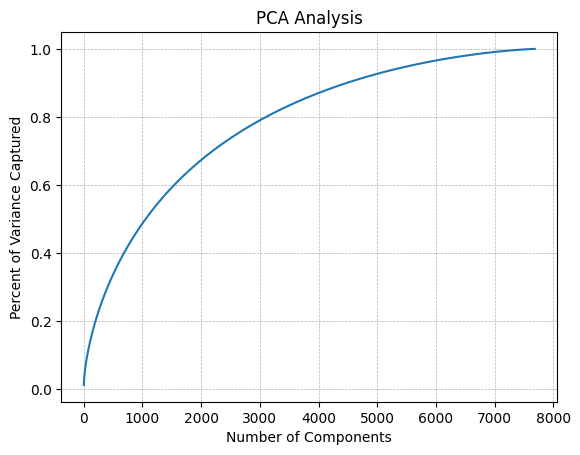

In [ ]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7682, 5543)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## ***ML Model Implementation***

### **ML Model - 1 (K-Means Clustering)**

K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's just itterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.

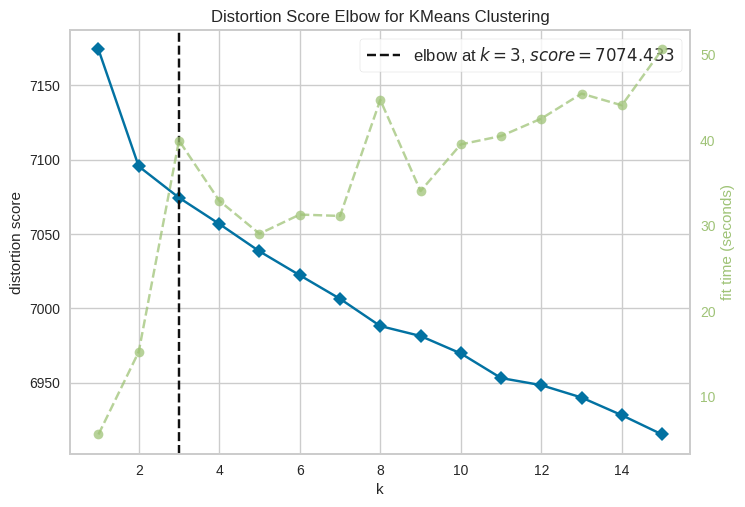

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but our graph is indicating it at 3 so before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

What is **Silhouette Score**?

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

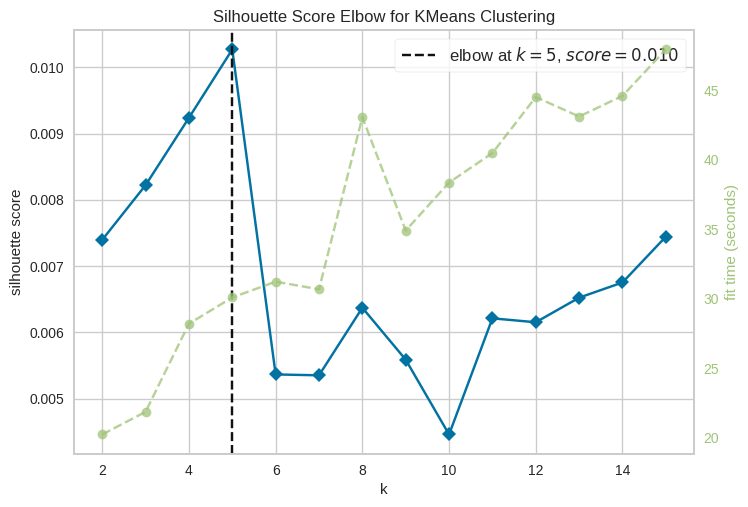

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.007969
k=3, Silhouette score=0.008705
k=4, Silhouette score=0.009507
k=5, Silhouette score=0.010221
k=6, Silhouette score=0.010066


From the above plots  Sillhouette plot it is very clear that the Silhoutte score is comparatively good for 6 number of clusters, so we will consider 6 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.

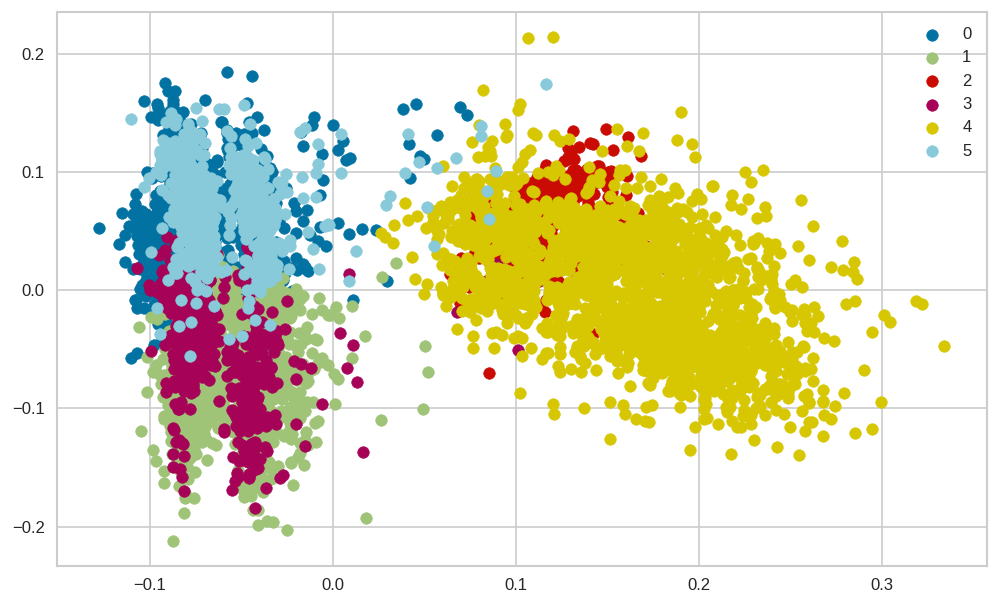

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

We have 6 different clusters but  the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

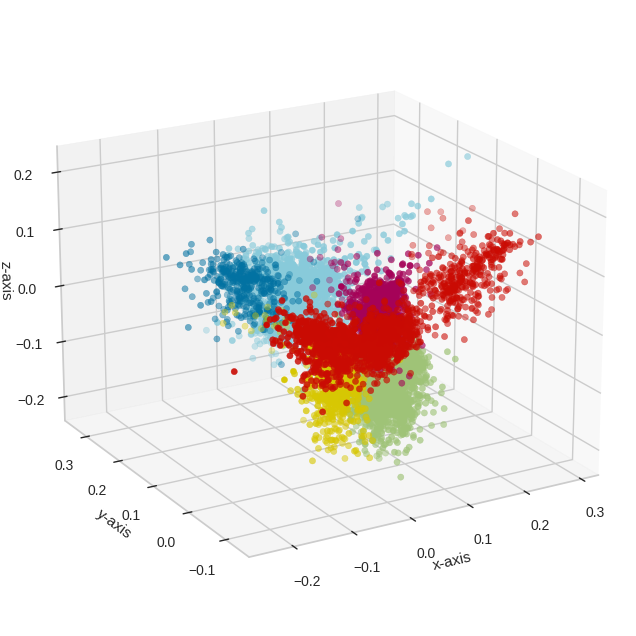

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y','c','m']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

To some extent we can differentiate all the 6 clusters with naked eye. Now let's assign the 'Conent' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
data['kmeans_cluster'] = kmeans.labels_

#### **1. Explain the ML Model used and it's performance ?**

Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    data_wordcloud = data[['kmeans_cluster', column_name]].dropna()
    data_wordcloud = data_wordcloud[data_wordcloud['kmeans_cluster'] == cluster_number]
    data_wordcloud = data_wordcloud[data_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in data_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

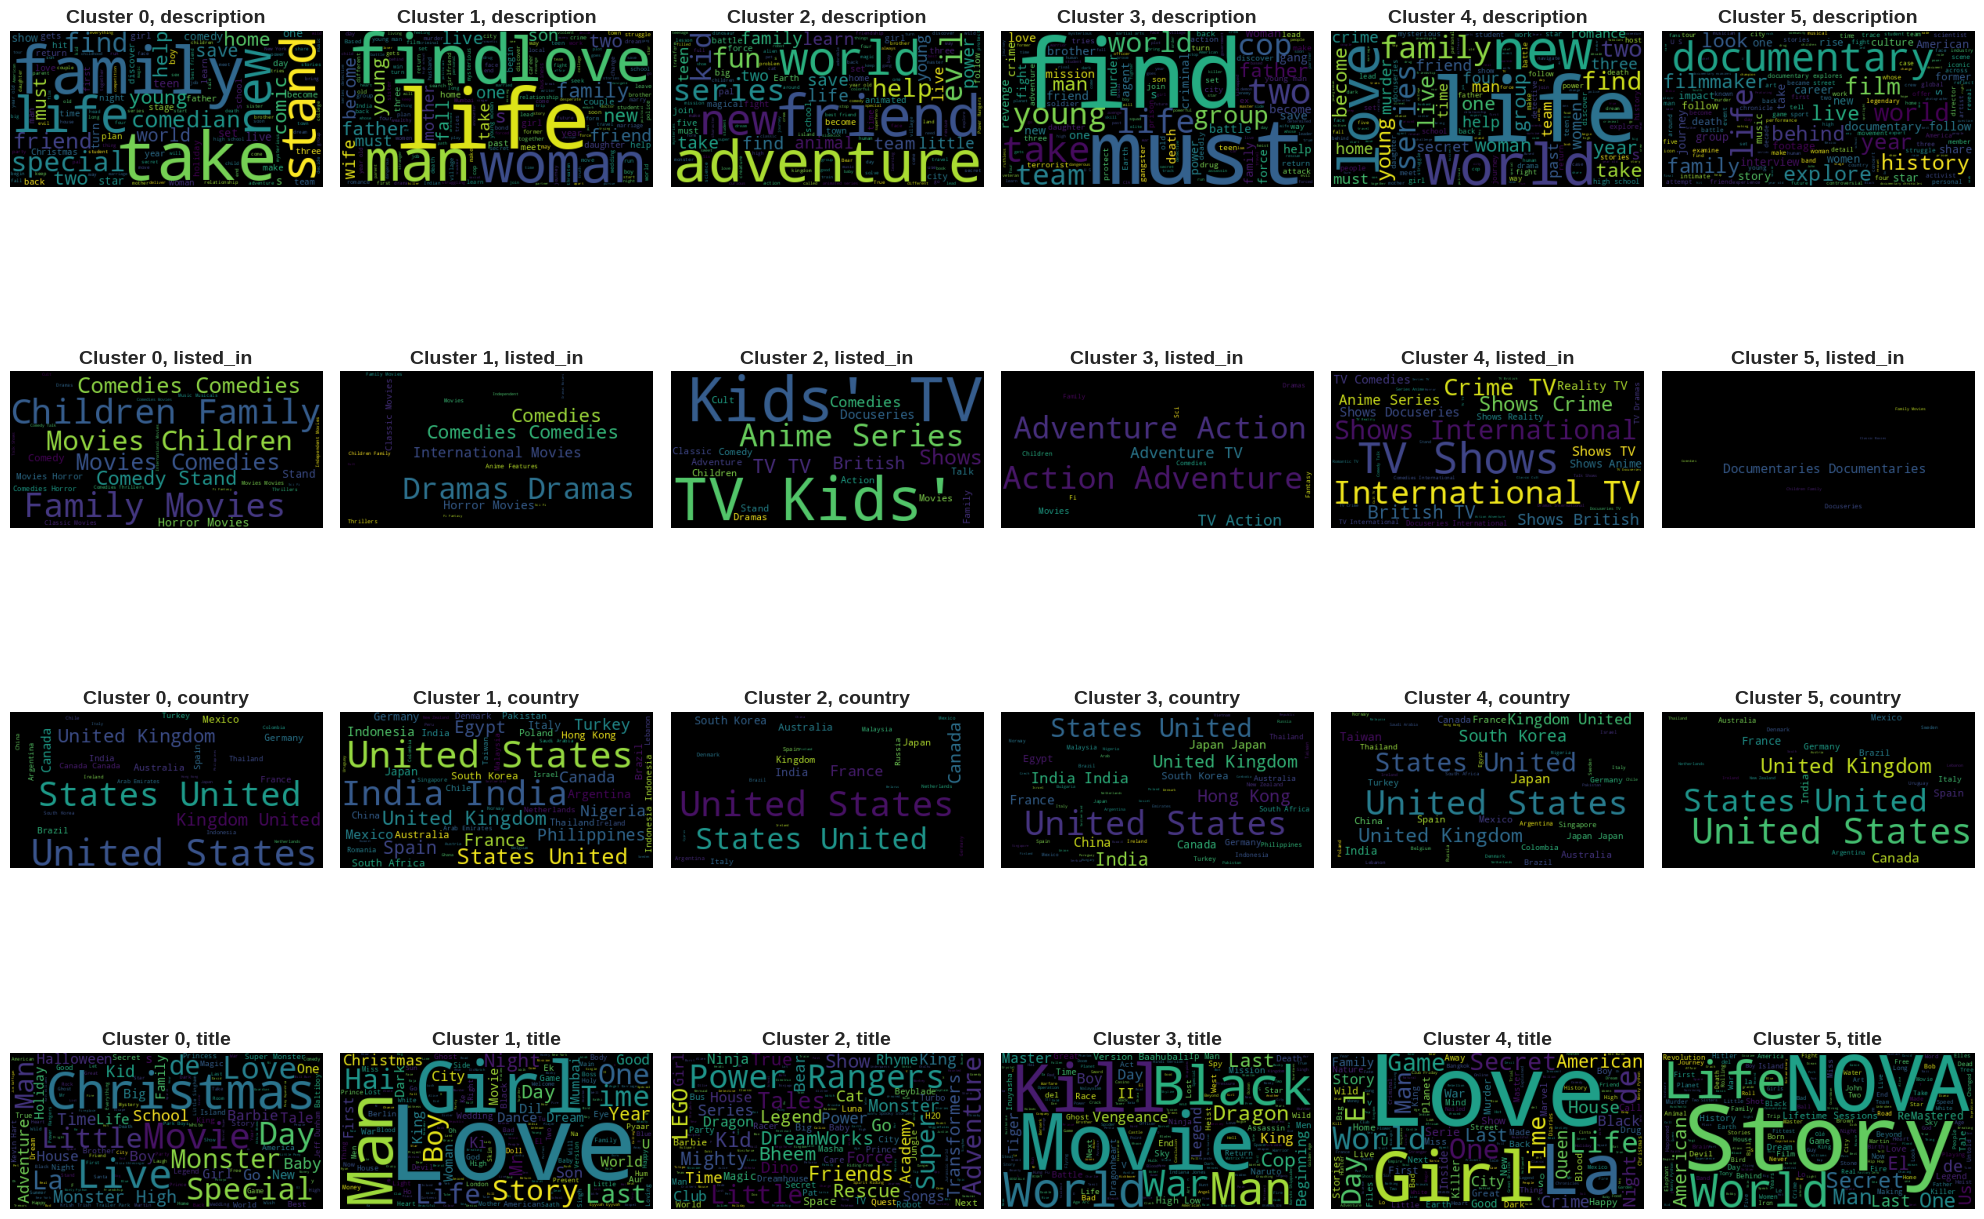

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))
for i in range(6):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### **ML Model - 2 (Hierarchial Clustering)**

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

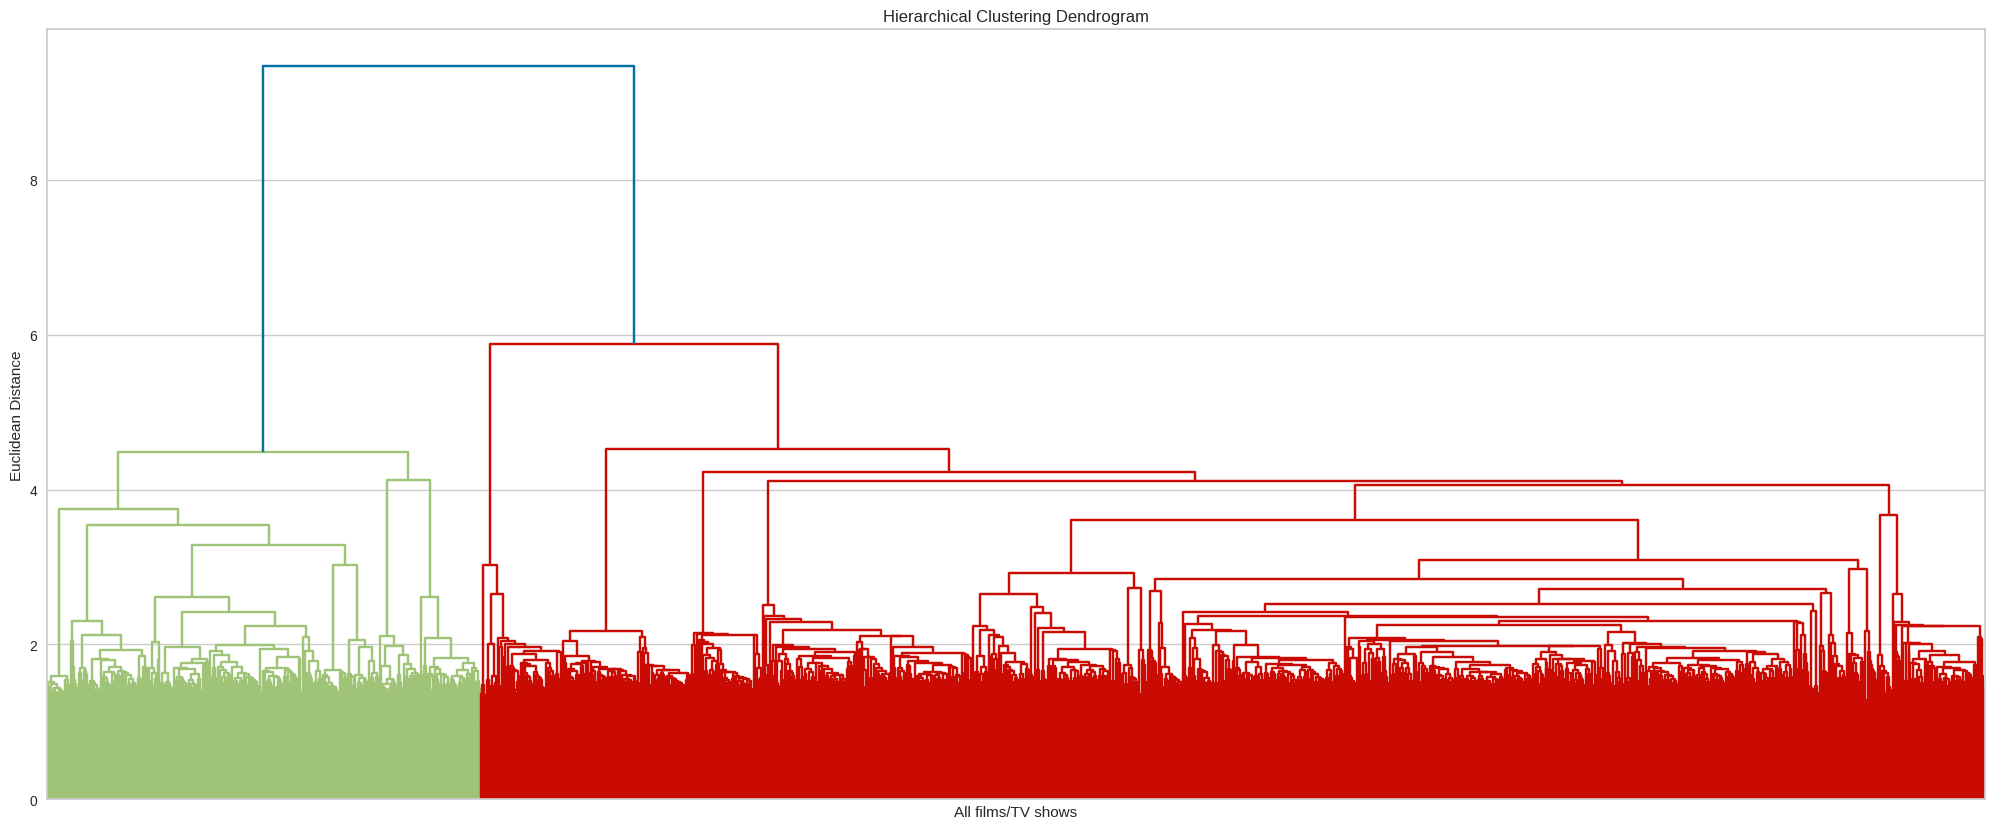

In [ ]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 7)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.003166
k=3, Silhouette score=0.002950
k=4, Silhouette score=0.002997
k=5, Silhouette score=0.000522
k=6, Silhouette score=0.000004


From the above silhouette scores it is clear that the 2 clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

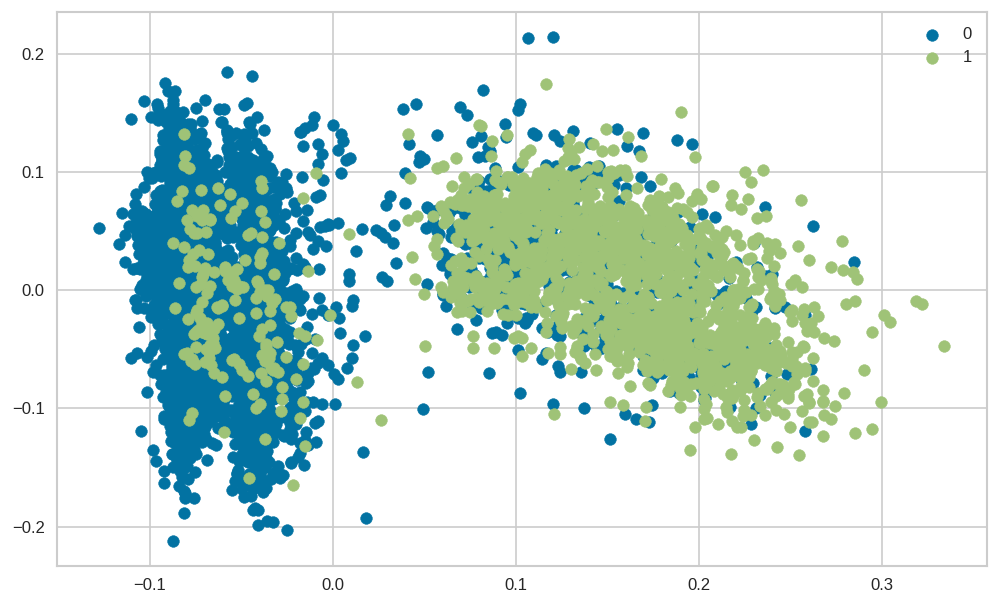

In [ ]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

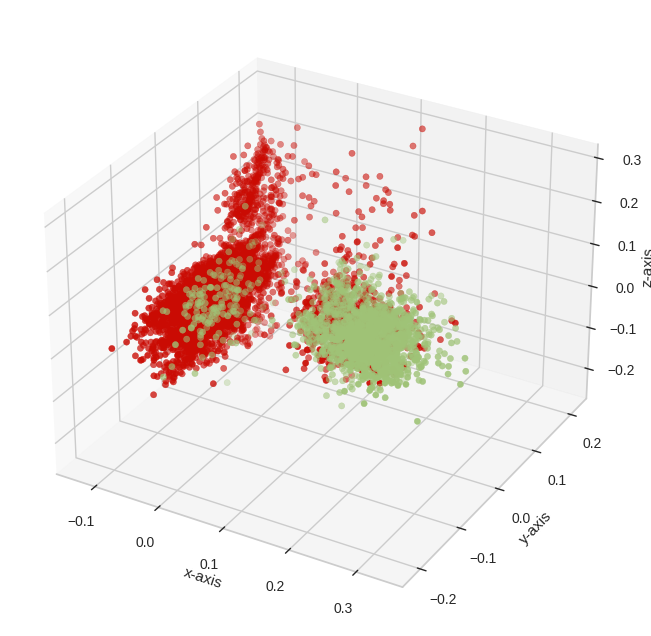

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y','c','m']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

So,we can again easily differentiate the all 2 clusters with naked eye. Now let's assign the 'Content(Movies and TV Shows)' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
data['agglomerative_cluster'] = Agmodel.labels_


#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Let's just again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [ ]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  data_wordcloud = data[['agglomerative_cluster', column_name]].dropna()
  data_wordcloud = data_wordcloud[data_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in data_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

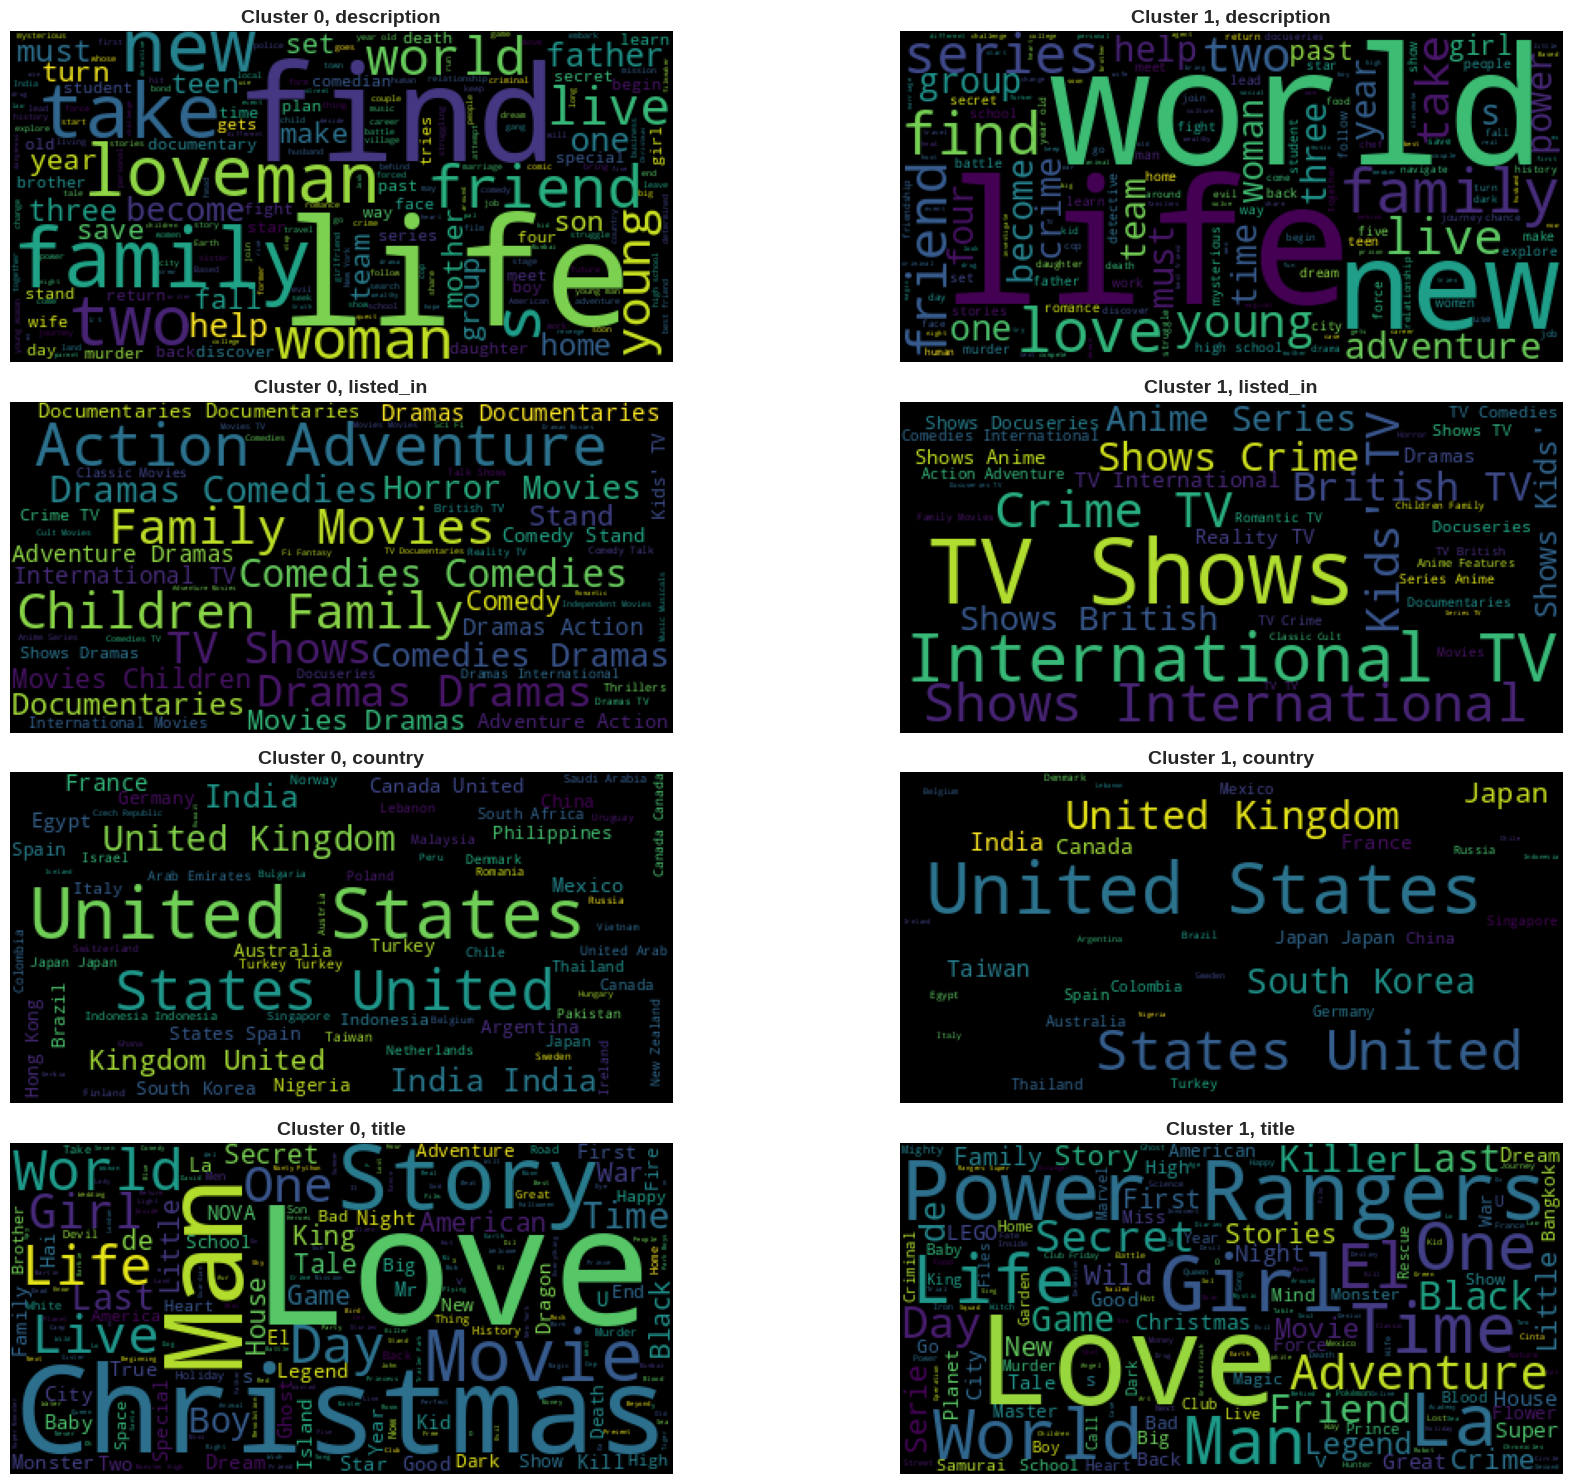

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### **ML Model - 3 (Building a Recommendaton System)**

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We are using cosine similarity over tf-idf because:

* Cosine similarity handles high dimensional sparse data better.

* Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [ ]:
# Importing needed libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['text_attributes'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=data):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

Let's check how our recommender system is performing

In [ ]:
# Testing indian movie
recommend_content('Kal Ho Naa Ho')

Recommendation  Similarity_score(0-1)
0  Abducted in Plain Sight                 0.1756
1               After Life                 0.1528
2                  Sisters                 0.1490
3                Lady-Like                 0.1433
4              Katti Batti                 0.1310
5          Chashme Baddoor                 0.1300
6                     Edha                 0.1258
7          Chashme Buddoor                 0.1257
8            Patiala House                 0.1162
9                      Amy                 0.1130

In [ ]:
# Testing non indian movie
recommend_content('Zombieland')

Recommendation  Similarity_score(0-1)
0      30 Minutes or Less                 0.1849
1        True to the Game                 0.1432
2              Rust Creek                 0.1314
3            Black Summer                 0.1302
4              Submission                 0.1267
5        The Bridge Curse                 0.1217
6  The Ottoman Lieutenant                 0.1158
7  The Last Kids on Earth                 0.1151
8              Grand Army                 0.1114
9               Lady-Like                 0.1101

In [ ]:
# Testing indian tv show
recommend_content('Zindagi Gulzar Hai')

Recommendation  Similarity_score(0-1)
0       Bangkok Bachelors                 0.2236
1         Love Me As I Am                 0.2113
2                Humsafar                 0.1938
3         Yeh Meri Family                 0.1577
4         College Romance                 0.1490
5  The Girl from the Song                 0.1465
6    Accidentally in Love                 0.1451
7   A Thousand Goodnights                 0.1407
8              Second 20s                 0.1351
9                  Janaan                 0.1310

In [ ]:
# Testing non indian tv show
recommend_content('Vampires')

Recommendation  Similarity_score(0-1)
0                   Balto                 0.2506
1      The Little Vampire                 0.2255
2                Dinotrux                 0.2188
3  The Bonfire of Destiny                 0.2104
4                 The End                 0.1933
5          Vampire Knight                 0.1712
6             Van Helsing                 0.1705
7     Liar, Liar, Vampire                 0.1673
8           The Originals                 0.1637
9               The Crown                 0.1636

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen **Silhoutte Score over Distortion Score** (also known as inertia or sum of squared distances) as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* Silhouette score is less sensitive to the shape of the clusters, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered **K-means** as our final model, as we are getting the comparatevely **high Silhoutte Score in K-means clustering** and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:

* **Speed:** K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use:** K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability:** K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters:** K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

* **Business Impact:** The quality of the clusters directly influences the business impact of the analysis. Well-separated clusters can lead to personalized recommendations, content categorization, and targeted marketing strategies, enhancing the user experience and potentially driving business improvements.

* **Alignment with Project Goals:** K-Means aligns with the project's objectives of understanding content trends and user preferences on Netflix. It offers a practical approach for segmentation and content analysis.

In the context of clustering models like K-Means, traditional feature importance techniques such as those used in supervised learning models (e.g., Random Forest, Gradient Boosting) do not directly apply. Clustering models are unsupervised, meaning they don't have target variables to rank features by importance in the same way.

However, we can gain insights into the feature importance in a clustering context by considering the centroids of clusters and the distribution of data points within each cluster. Here's how we can do it:

**Centroid Analysis:** In K-Means clustering, each cluster is represented by a centroid, which is the mean of all data points in that cluster. We can interpret the features of the centroids as indicative of the cluster's characteristics. Features with significantly different values between clusters may be considered important for distinguishing those clusters.

**Visual Inspection:** Visualization tools like t-SNE (t-distributed Stochastic Neighbor Embedding) or PCA (Principal Component Analysis) can help you explore the distribution of data points within clusters. By visualizing the data in a reduced-dimensional space, we can identify which features contribute to the separation of clusters.

**Dimension Reduction:** We can apply dimension reduction techniques like PCA to identify which principal components explain most of the variance in the data. The original features that contribute the most to these principal components can be considered important for clustering.

**Feature Scaling:** Proper feature scaling is crucial in K-Means clustering. Features that are not scaled appropriately may have an unequal impact on cluster assignments. Therefore, scaling features can indirectly help identify their importance in the clustering process.

**Silhouette Analysis:** Silhouette analysis, which we have used, provides information about how well-separated clusters are. Features that contribute to higher silhouette scores for each cluster are likely to be important in defining those clusters.

**Interpretation:** Interpretability is a critical aspect of understanding feature importance in clustering. Reviewing the actual data points within clusters and exploring how features differ across clusters can provide valuable insights.

In summary, feature importance in clustering models like K-Means is derived from the differences in feature values between clusters and how these differences contribute to the separation and formation of clusters. While there are no direct feature importance scores as in supervised learning models, these techniques and tools can help we gain insights into the role of features in the clustering process.

# **Conclusion**

### **Conclusions drawn from EDA**

Conclusions drawn from EDA
Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, we have drawn the following conclusions:

Movies make up about two-thirds of Netflix content, with TV shows comprising the remaining one-third.

Adult and teen categories are prevalent on Netflix, while family-friendly content is more common in TV shows than in movies.

Indian actors dominate Netflix movies, while popular Indian actors are absent from TV shows.

Jan Suter is the most common movie director, and Ken Burns is the most common TV show director on Netflix.

The United States is the largest producer of movies and TV shows on Netflix, followed by India. Japan and South Korea have more TV shows than movies, indicating growth potential in that area.

International movies, drama, and comedy are the most popular genres on Netflix.

TV show additions on Netflix have increased since 2018, while movie additions have decreased. In 2020, fewer movies were added compared to 2019, but more TV shows were added.

October, November, and December are popular months for adding TV shows, while January, October, and November are popular for adding movies. February sees the least additions.

Movies and TV shows are typically added at the beginning or middle of the month and are popularly added on weekends.

Most movies on Netflix have durations between 80 to 120 minutes, while TV shows commonly have one or two seasons.

Various countries contribute adult and teen content, with Spain producing the most adult content and Canada focusing on children and family-friendly categories.

###**Conclusions drawn from ML Model**

Implemented K-Means Clustering and Agglomerative Hierarchical Clustering, to cluster the Netflix Movies TV show dataset.
The optimal number of clusters we are getting from K-means is 6, whereas for Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2.
We chose Silhouette Score as the evaluation metric over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.
Built a Recommendation system that can help Netflix improve user experience and reduce subscriber churn by providing personalized recommendations to users based on their similarity scores.
Integrating this dataset with external sources such as IMDB ratings,books clsutering ,Plant based Type clustering can lead to numerous intriguing discoveries.

By incorporating additional data, a more comprehensive recommender system could be developed, offering enhanced recommendations to users. This system could then be deployed on the web for widespread usage.

### ***Hurrah! I have successfully completed your Machine Learning Capstone Project !!!***